In [8]:
import sys, os, time, datetime, h5py, json, glob
import numpy as np
from scipy.stats import norm, expon, chi2, uniform, chisquare, poisson, beta
from scipy.special import logsumexp
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.font_manager as font_manager
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')

from tests_gaia import *

# 1D

In [48]:
flk_sigmas = [
    0.01,
    0.1, 
    0.3,
    0.7, 
    1.4,
    2.3,
    3.0,
    4.5,
    9.0,
]
files = [
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS0_M1000_lam1e-06/NR200000_NB2000_NS0_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS7_loc4_std0.01_M1000_lam1e-06/NR200000_NB2000_NS7_loc4_std0.01_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS18_loc4_std0.16_M1000_lam1e-06/NR200000_NB2000_NS18_loc4_std0.16_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS13_loc4_std0.64_M1000_lam1e-06/NR200000_NB2000_NS13_loc4_std0.64_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS90_loc1.6_std0.16_M1000_lam1e-06/NR200000_NB2000_NS90_loc1.6_std0.16_M1000_lam1e-06.h5',
    './exp_gaia/1D/w1-5-25-50-75-90-95-99-out/NR200000_NB2000_NS10_loc6.4_std0.16_M1000_lam1e-06/NR200000_NB2000_NS10_loc6.4_std0.16_M1000_lam1e-06.h5',
]


np_list = ['ref',
           'narrow_NB2000_NS7_loc4_std0.01',
           'narrow_NB2000_NS18_loc4_std0.16', 'broad_NB2000_NS13_loc4_std0.64', 
           'narrow_NB2000_NS90_loc1.6_std0.16', 'narrow_NB2000_NS10_loc6.4_std0.16']

tstat_dict = {}
i=0
for f5 in files:
    #print(NP, np_list[i])
    tmp = []
    f = h5py.File(f5, 'r')
    if not len(flk_sigmas):
        flk_sigmas = list(f.keys())
    for flk_sigma in flk_sigmas:
        key = str(flk_sigma) 
        tmp.append(np.array(f[key]))#[:100,]
    f.close()
    tstat_dict[np_list[i]] = np.stack(tmp, axis=1)
    i+=1

In [49]:
for NP in np_list:
    print(NP)
    ref = tstat_dict['ref'][:,[0,2,3,4,7,8]]
    data = tstat_dict[NP][:,[0,2,3,4,7,8]]
    ref_90 = tstat_dict['ref'][:,[5]]
    data_90 = tstat_dict[NP][:,[5]]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

ref
0 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
1 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
2 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
3 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
4 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
5 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
p-min	 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.003, 0.0011845061605967858, 0.0011792273321930107)]
p-prod	 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
p-avg	 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008

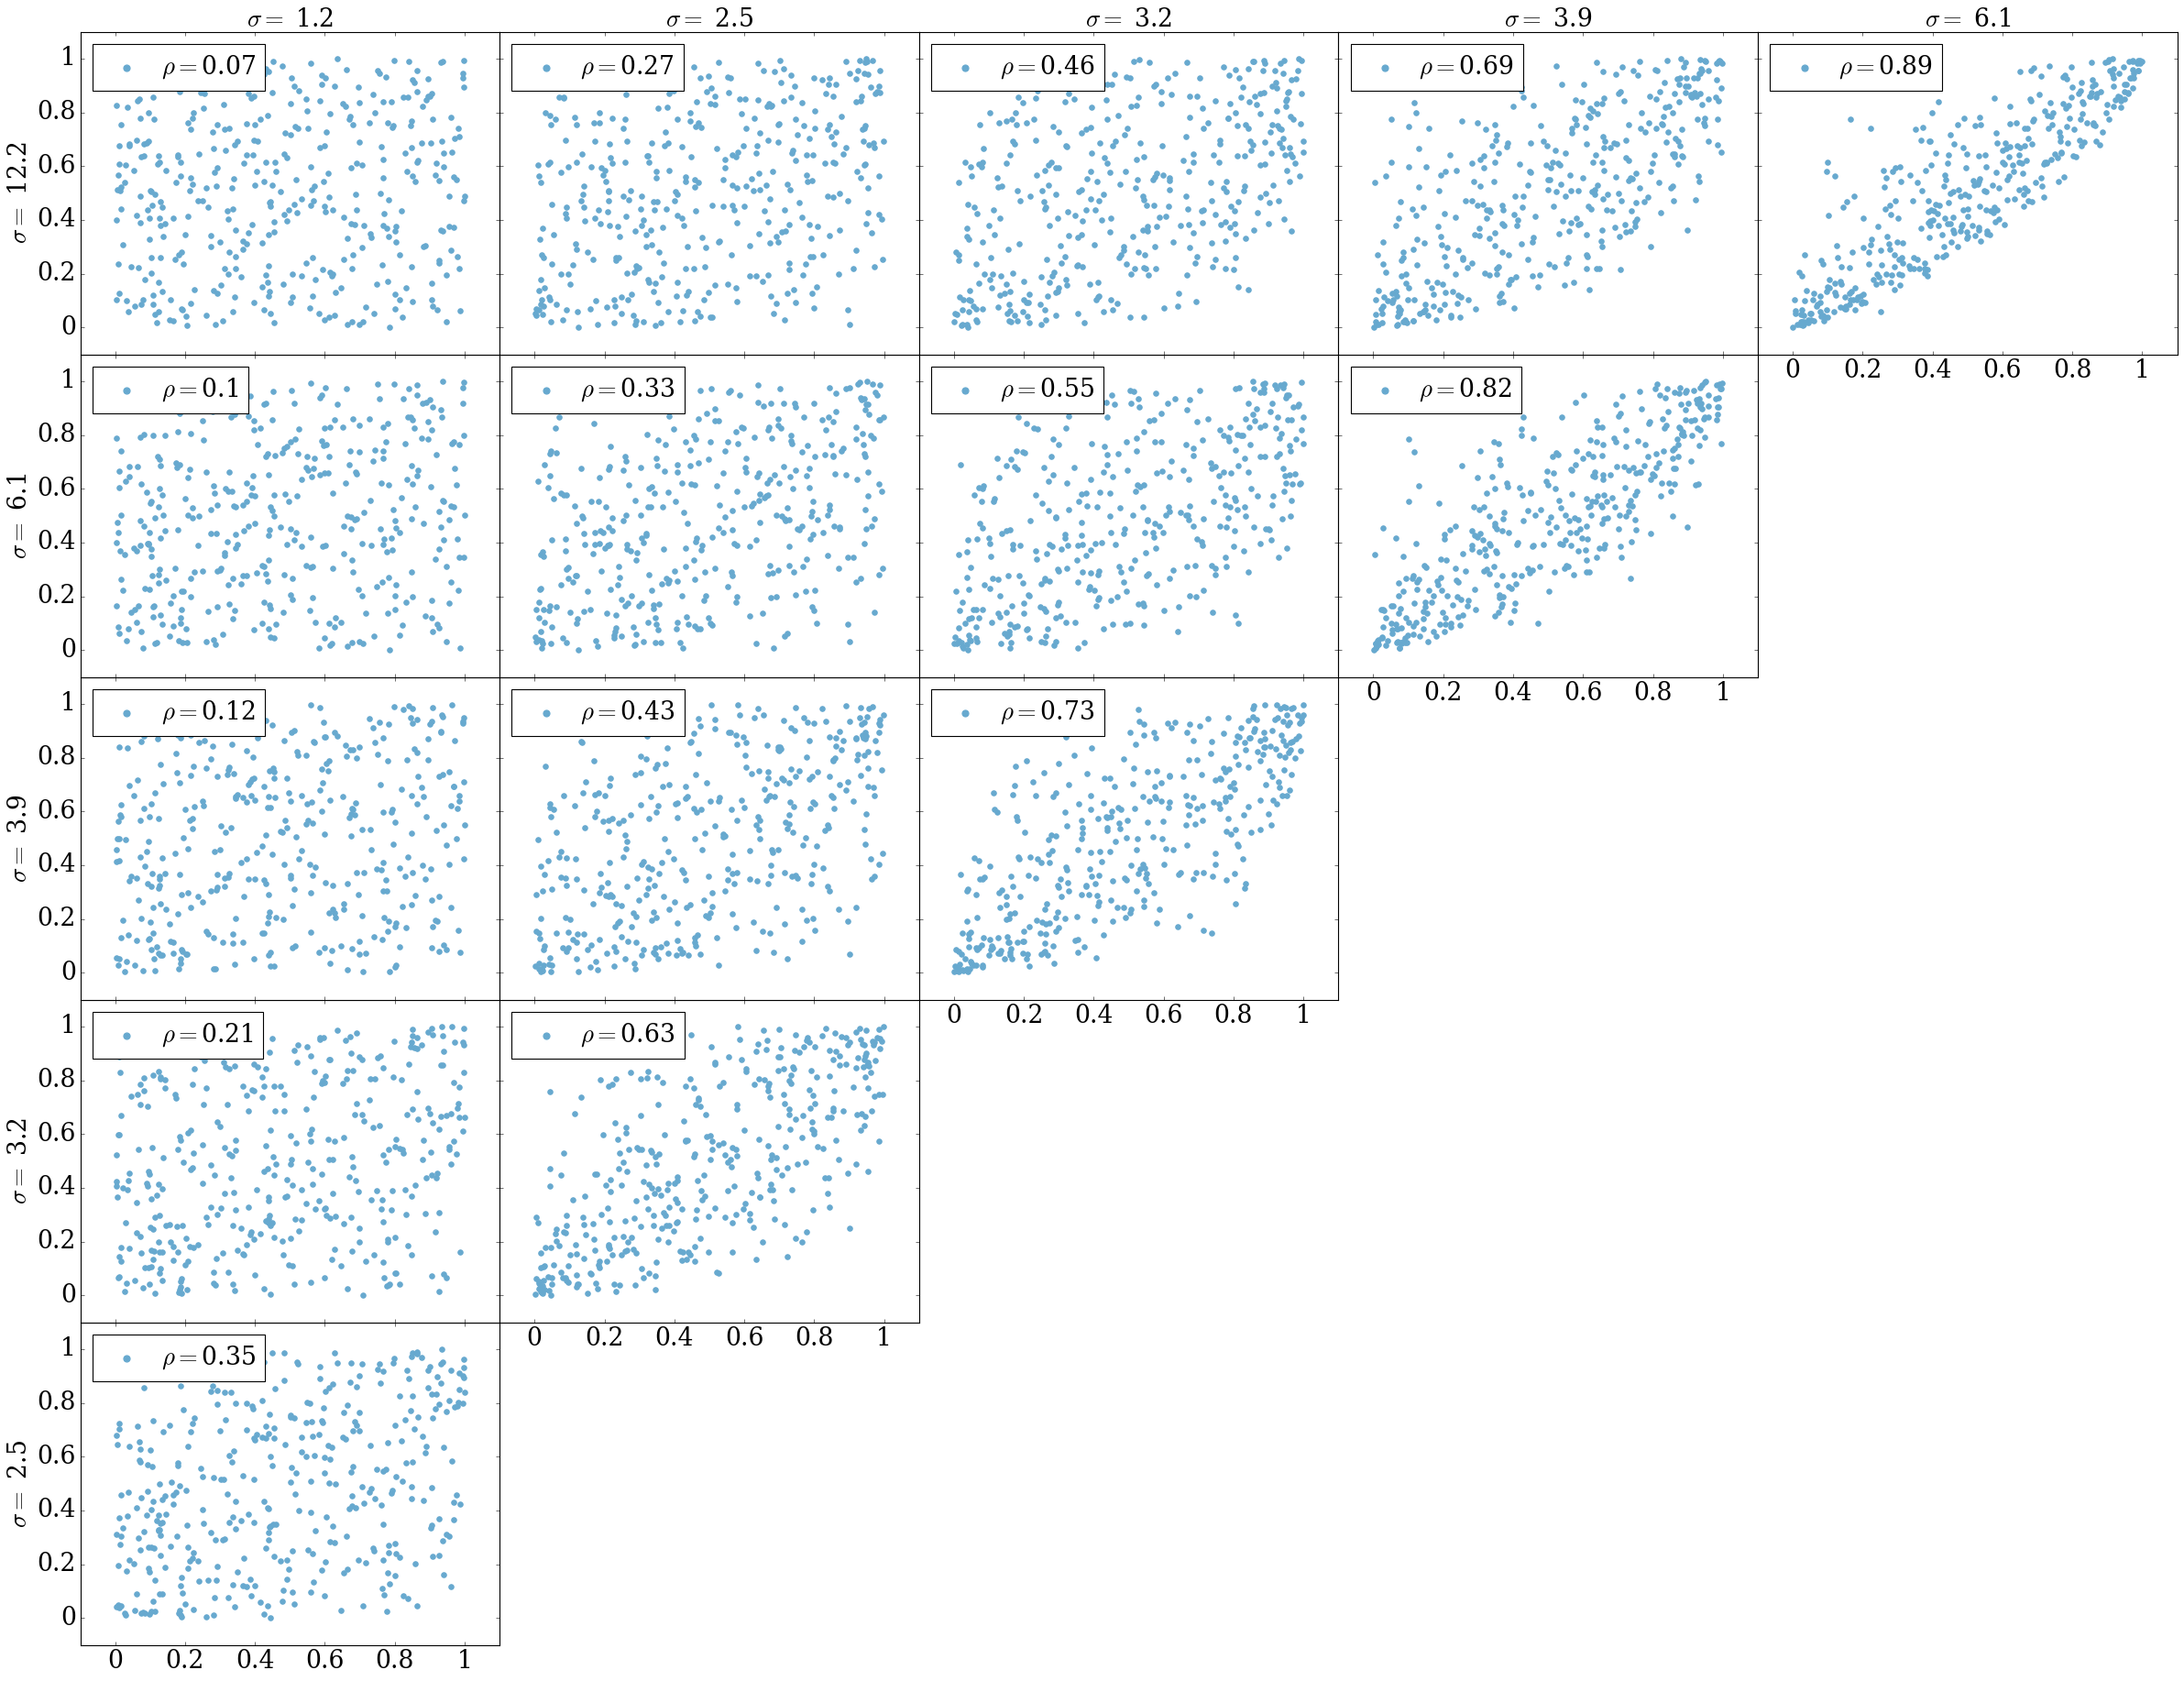

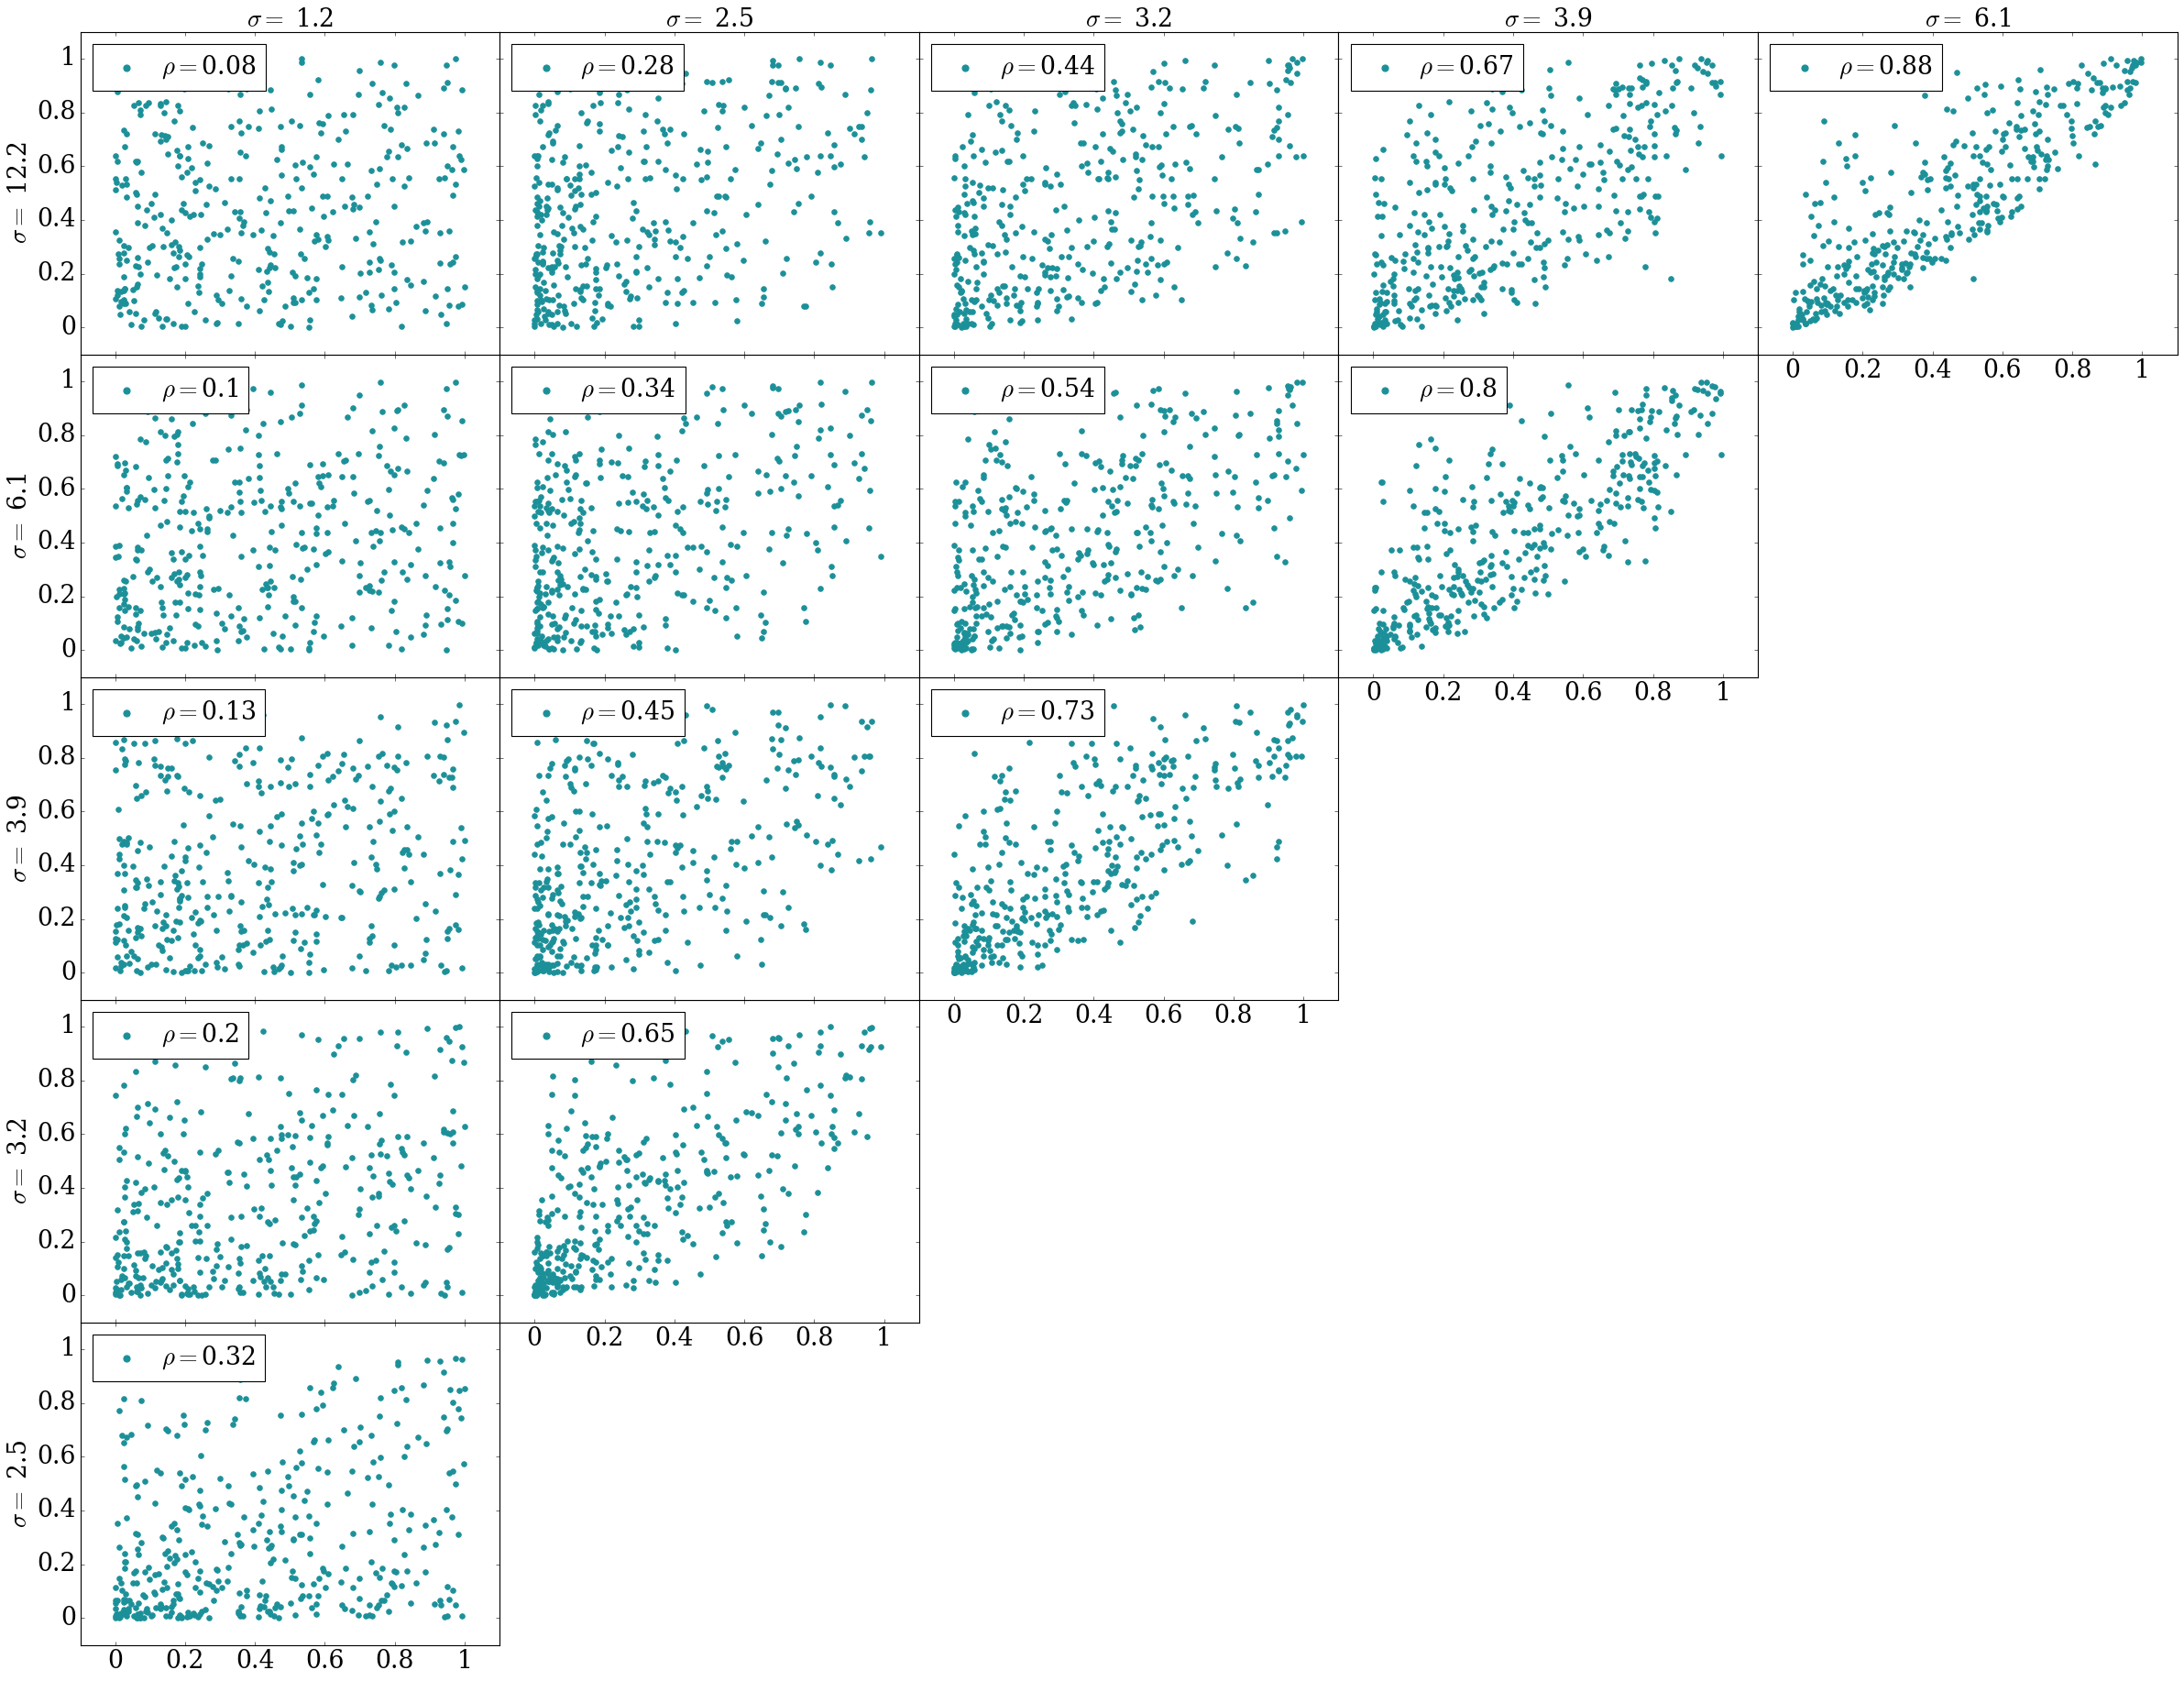

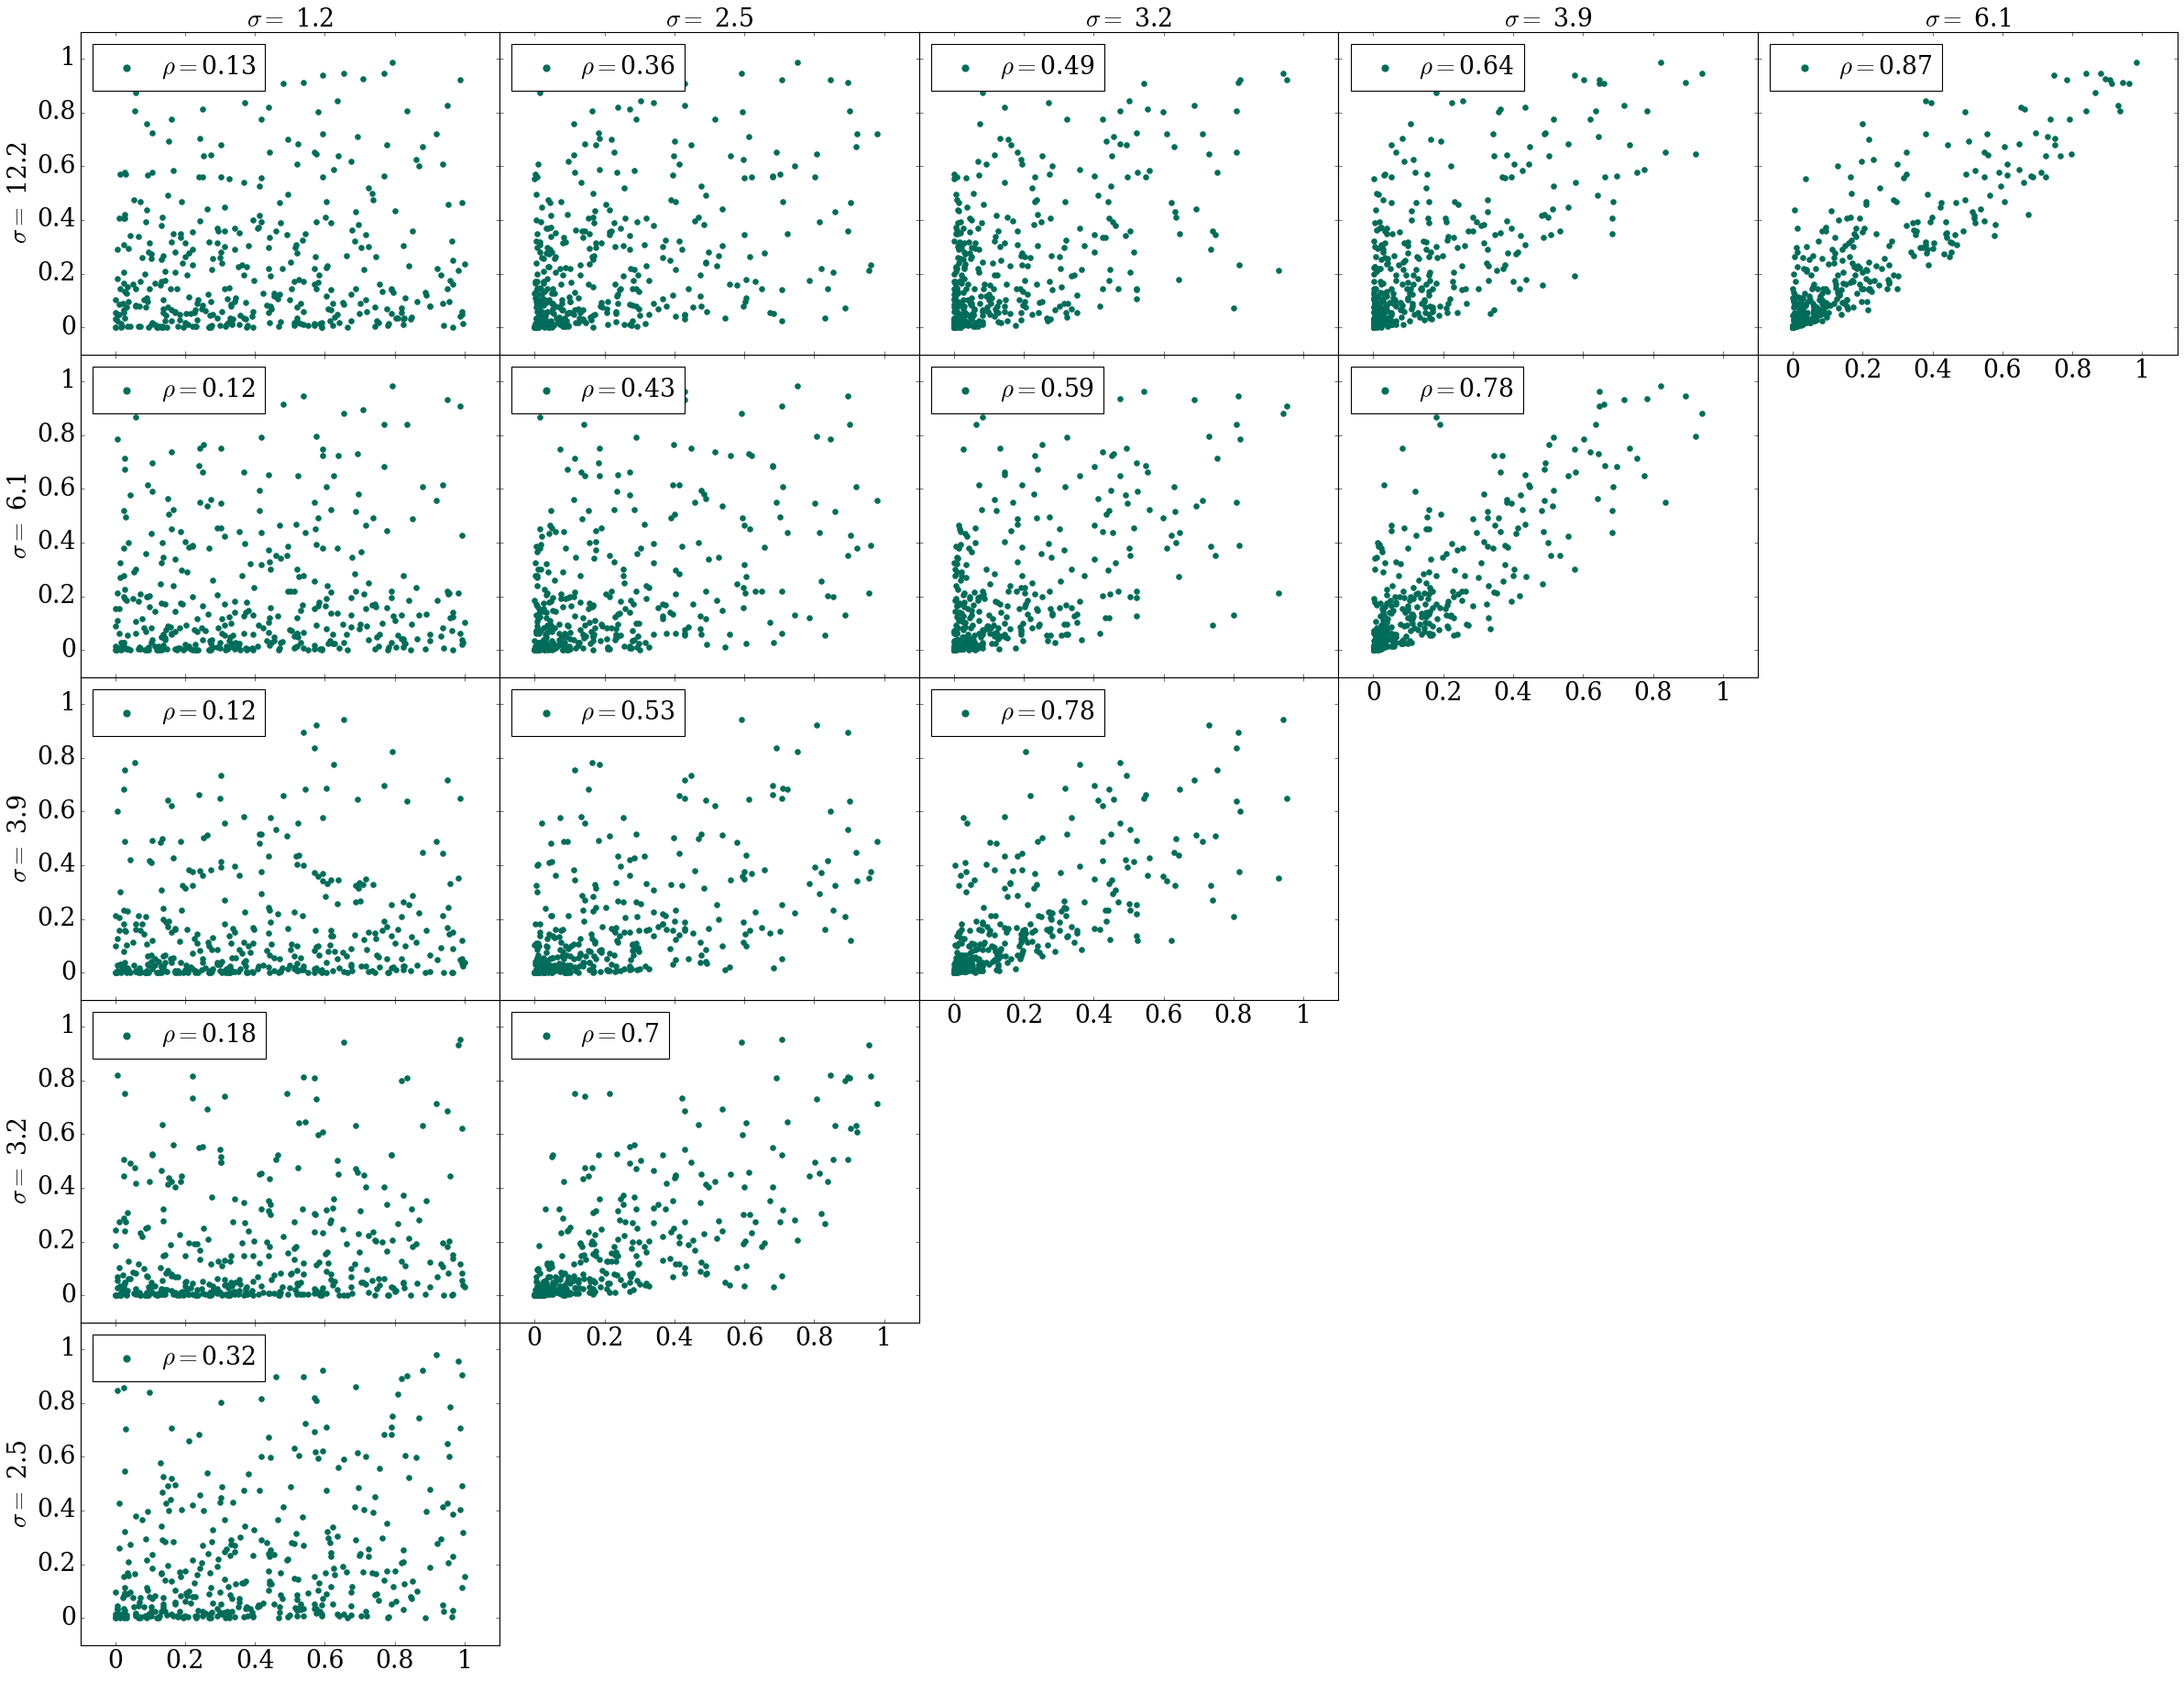

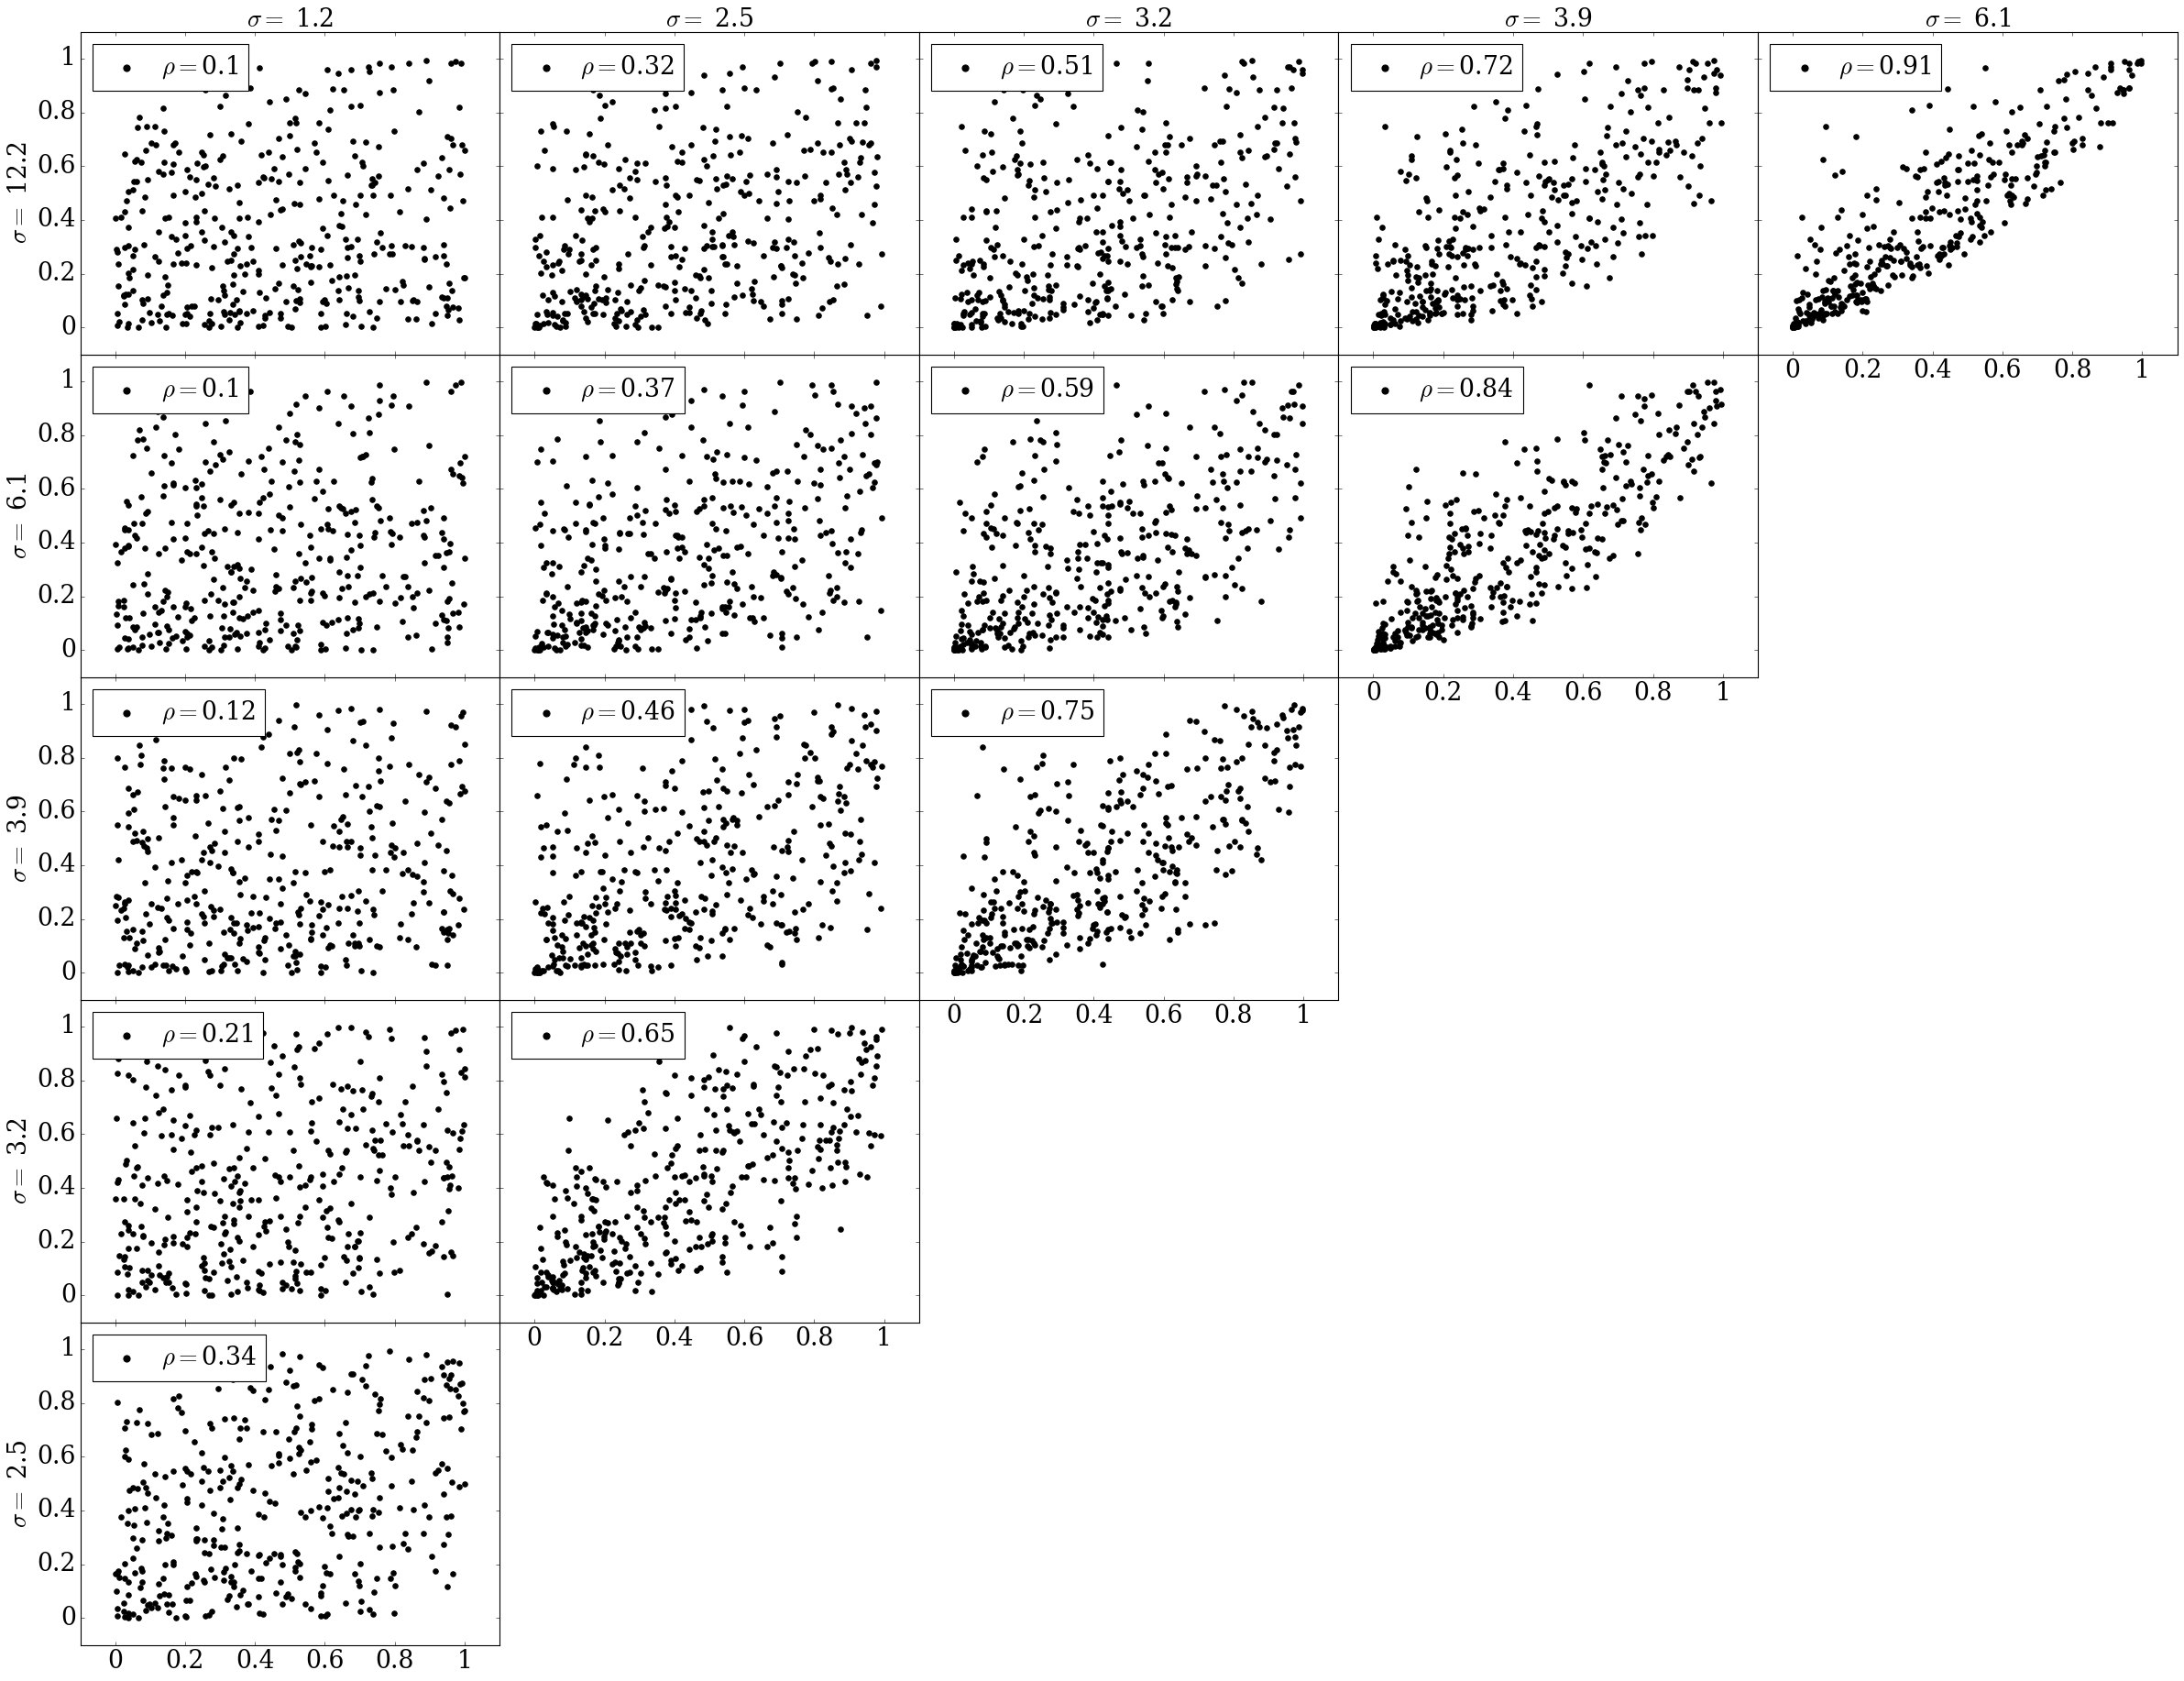

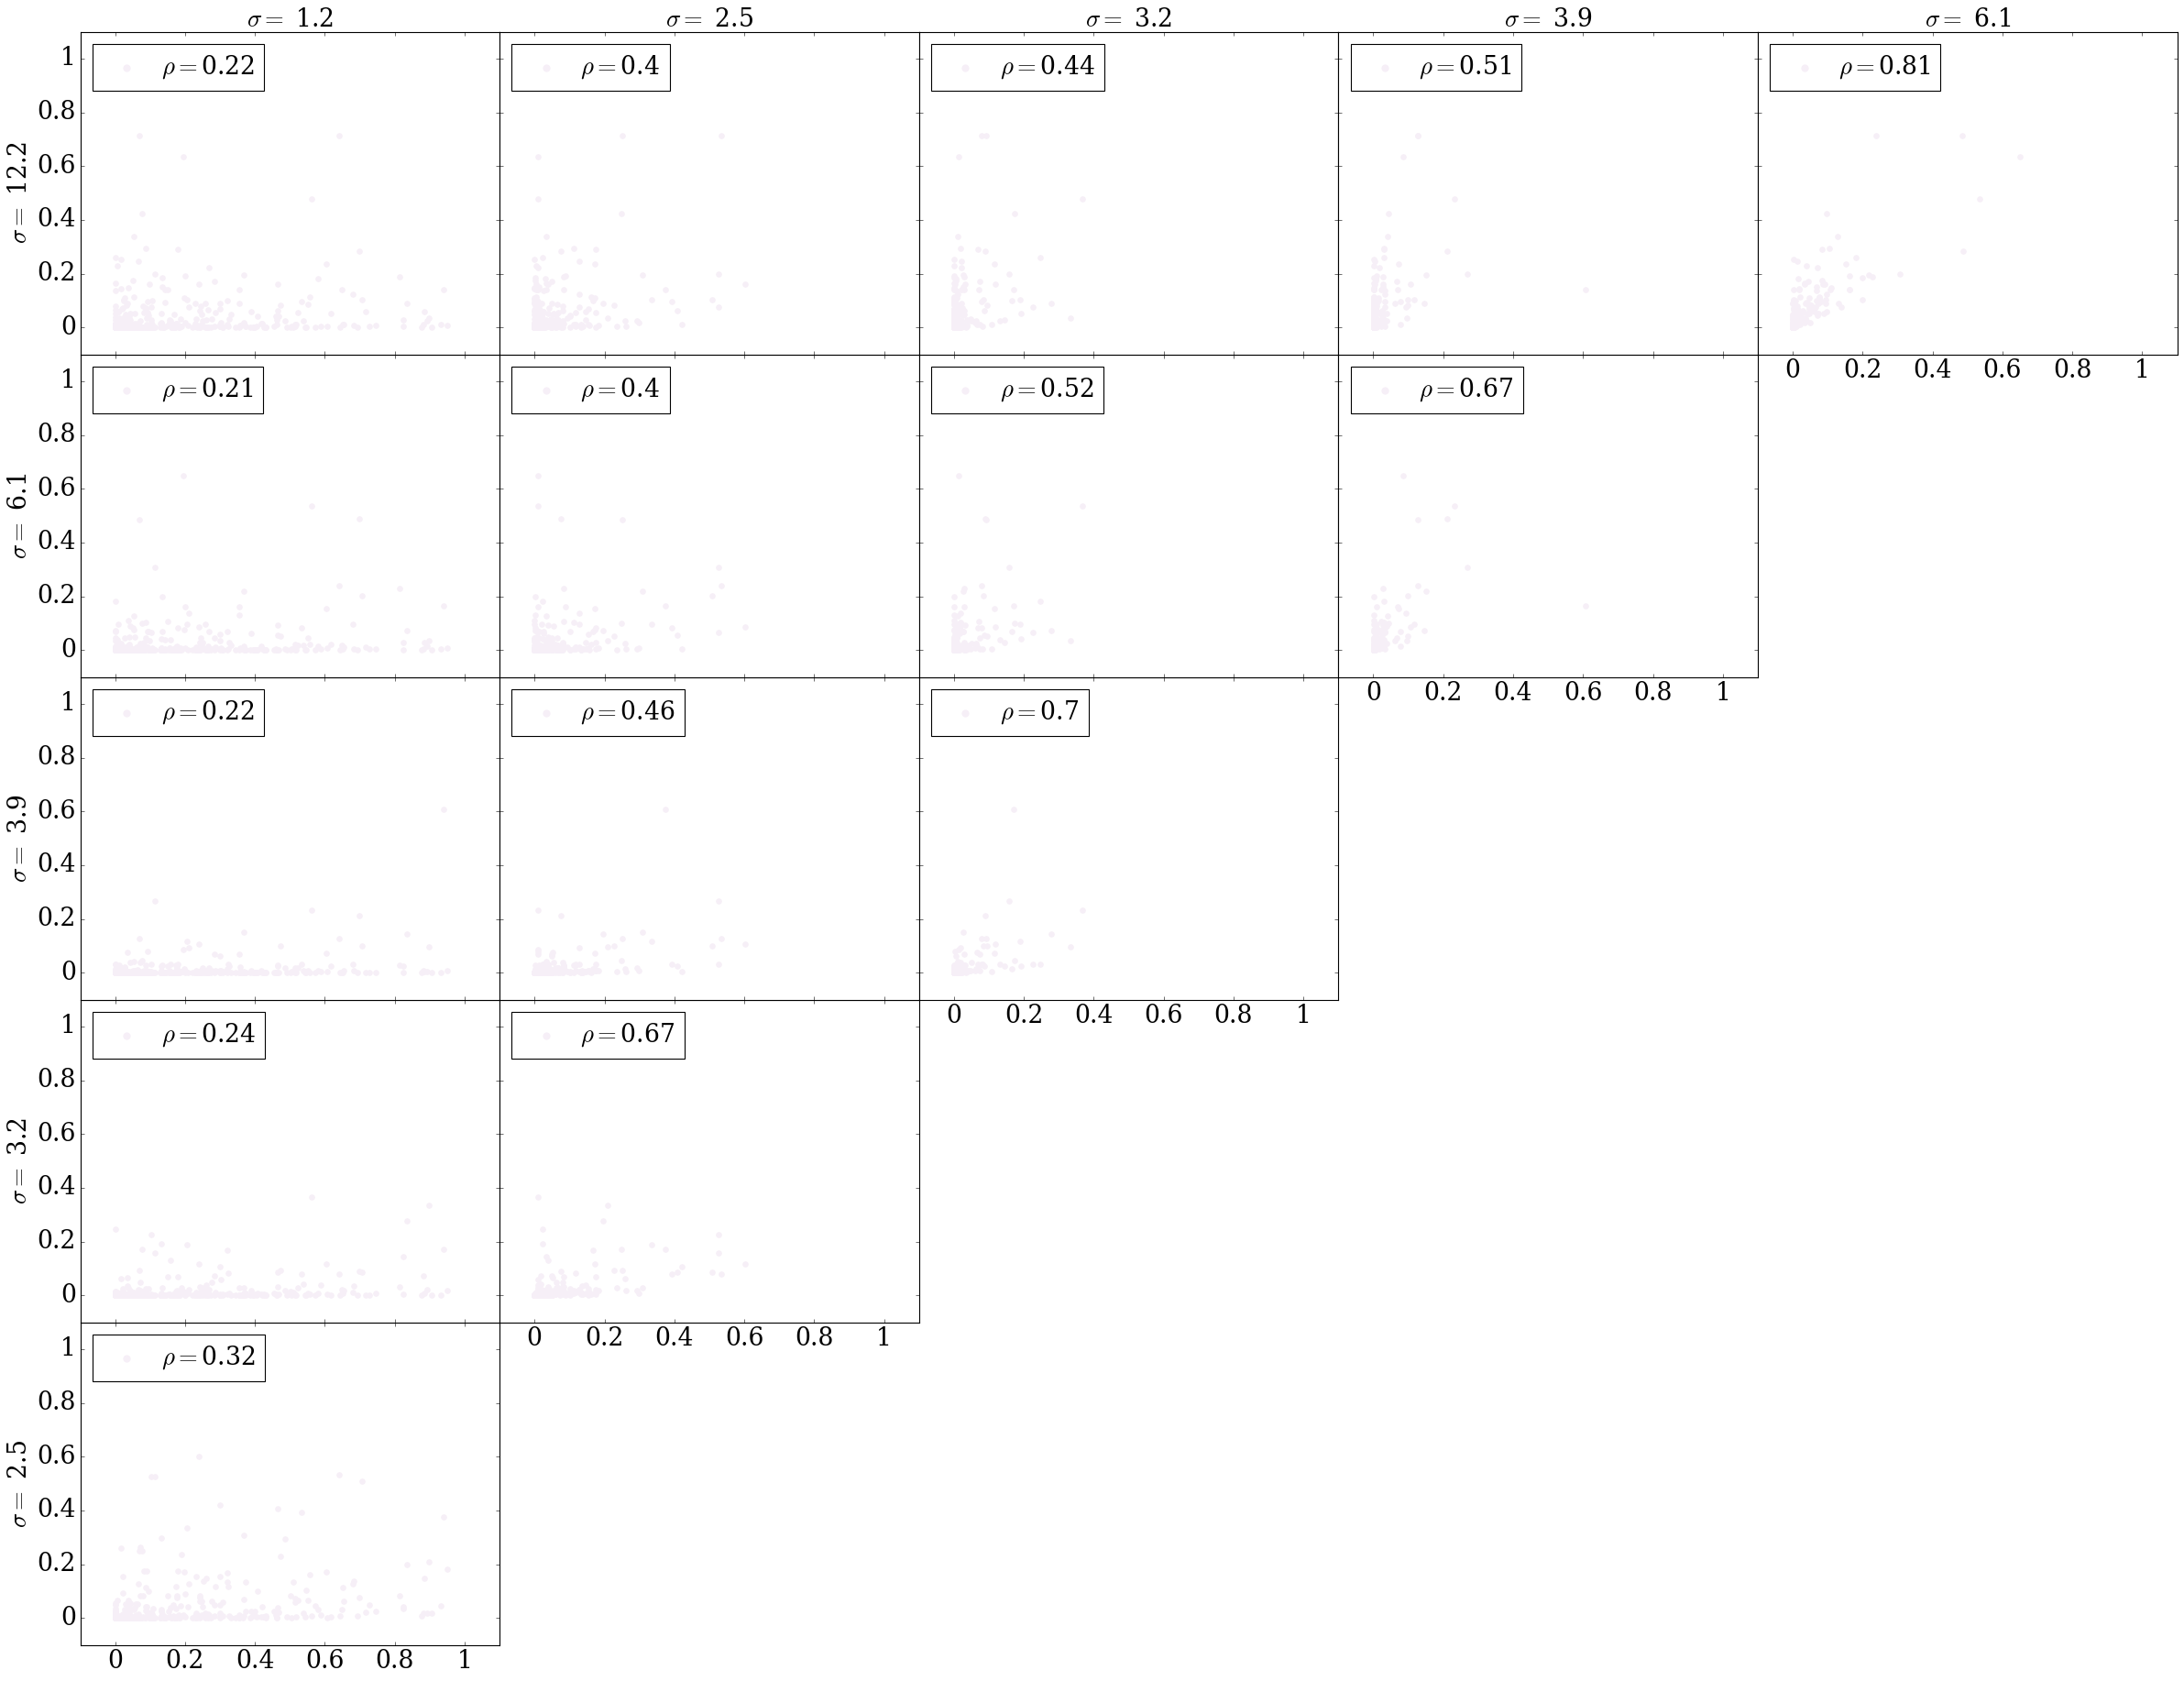

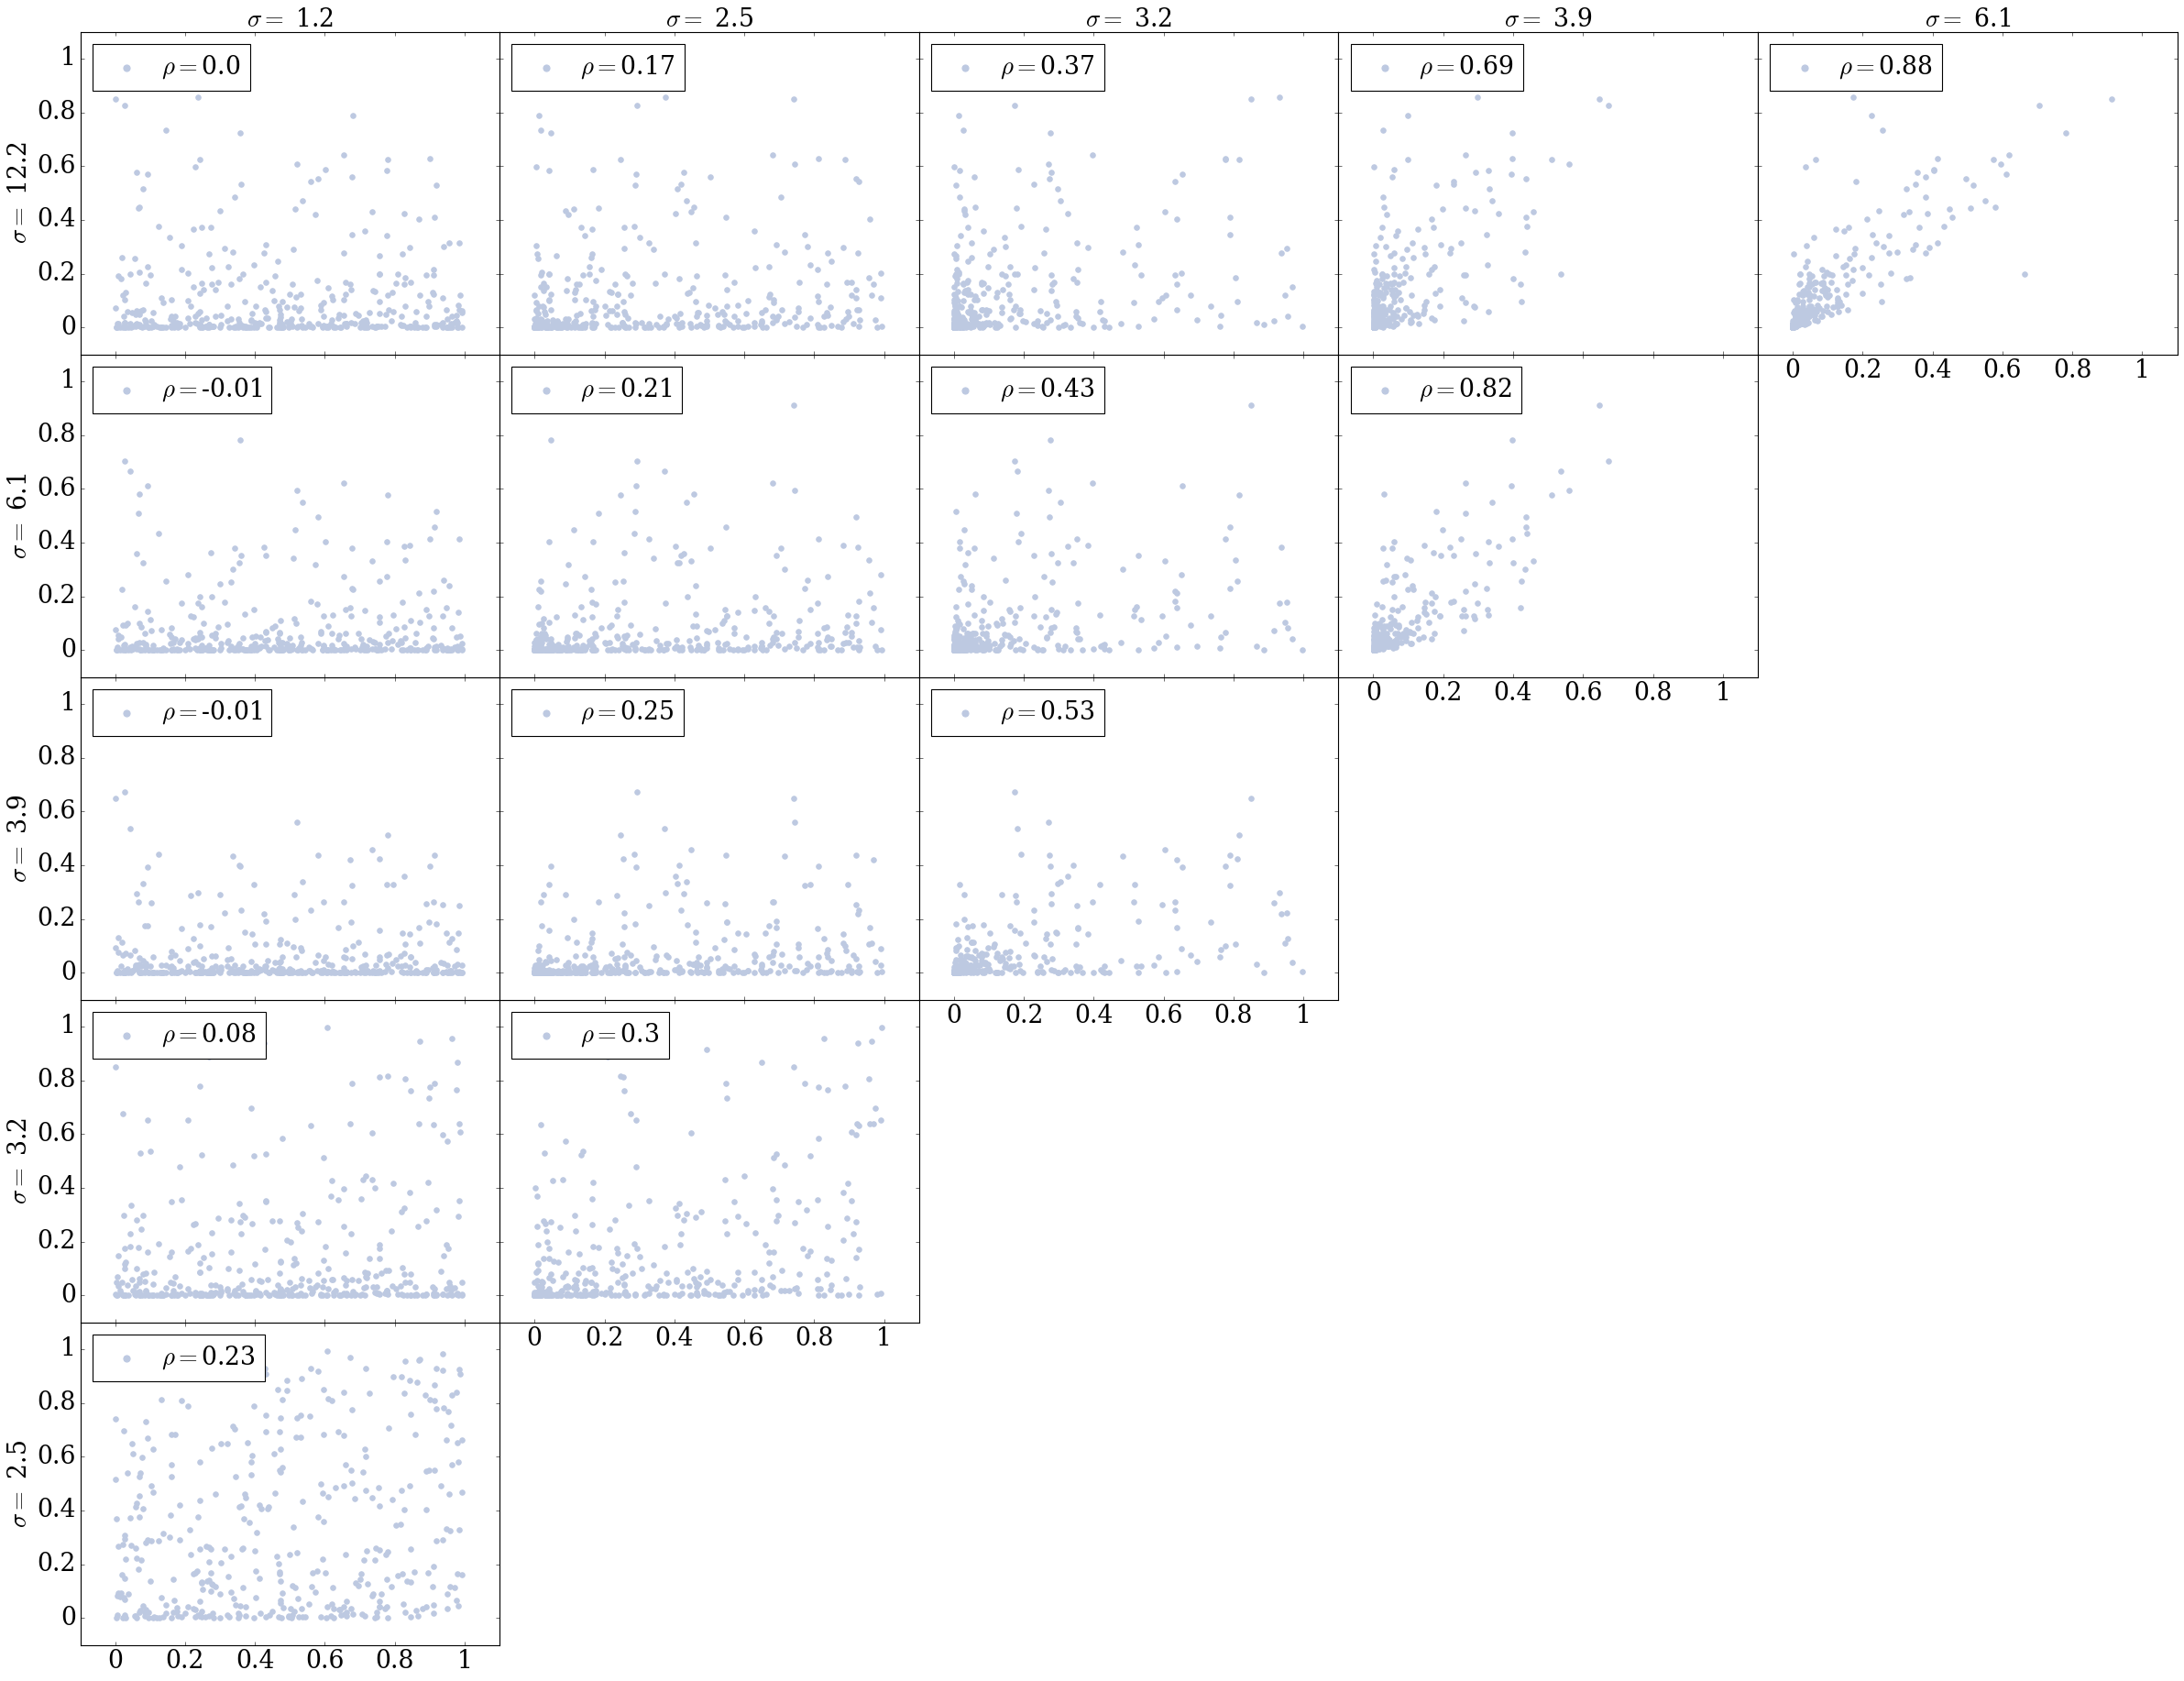

In [50]:
flk_sigmas = [1.2, #1.7, 
              2.5, 3.2, 3.9, 
              #4.6, 5.1, 
              6.1, 12.2]
labels_tests = [r'$\sigma=$ %s'%(str(flk_sigma)) for flk_sigma in flk_sigmas]
string_tests = ''

labels = [NP.replace('_', ' ').replace('NS', 'N(S)=').replace('std', r'$\sigma=$ ').replace('loc', r'$\bar x =$ ') for NP in np_list]
for s in labels_tests: string_tests+='_%s'%(s)

color = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2', 'darkblue', 'midnightblue']
color=['#67a9cf','#1c9099','#016c59', 'black', '#f6eff7','#bdc9e1',]
markers = ['o','o','o','o','o','o','o', 'o', 'o', 'o']
for k in range(len(np_list)):
    fig  = plt.figure(figsize=(26, 20))
    fig.patch.set_facecolor('white')
    for i in range(len(labels_tests)):
        for j in range(len(labels_tests)):
            if j<=i: continue
            ax= fig.add_axes([0.07+i*0.22, 0.07+(j-1)*0.22, 0.22, 0.22])
            if j>i:
                p_ref_i, p_data_i = return_pvalues(tstat_dict['ref'][:,i].reshape((-1,1)),tstat_dict[np_list[k]][:,i].reshape((-1,1)))
                p_ref_j, p_data_j = return_pvalues(tstat_dict['ref'][:,j].reshape((-1,1)),tstat_dict[np_list[k]][:,j].reshape((-1,1)))
                corr=np.corrcoef(p_data_i[:, 0], p_data_j[:, 0])[0][1]
                plt.scatter(p_data_i[:400,0], p_data_j[:400,0], color=color[k], s=24, marker=markers[k], 
                            label=r'$\rho=$%s'%(str(np.around(corr, 2)))#labels[k]
                           )
                font = font_manager.FontProperties(family='serif', size=24)
                plt.legend(prop=font, ncol=1, loc='upper left', scatterpoints=1, 
                           labelspacing=0.1, handletextpad=0.4, markerscale=1.3, frameon=True)        
            ax.set_xlim(-0.1, 1.1)
            ax.set_ylim(-0.1, 1.1)
            if not i:
                plt.ylabel(labels_tests[j],fontsize=24, fontname='serif')
                ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            else: 
                ax.tick_params(axis='y', which='both', labelleft=False)
            if i<=(j-2):
                ax.tick_params(axis='x', which='both', labelbottom=False)
            else:
                ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            if j==len(labels_tests)-1:
                plt.title(labels_tests[i],fontsize=24, fontname='serif')
    plt.savefig('./scatter_grid_1D_%i.pdf'%(k))
    plt.show()

# 5D

In [51]:
ref_folder = "./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/"
data_folders = [
    "./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/",
    "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS60_Z180_cut60/",
    "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS30_Z300_cut60/",
    "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS8_Z600_cut60/",
    "./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS53_EFT5_cut60/"
]

In [52]:
for data_folder in data_folders:
    print(data_folder)
    ref = np.load(ref_folder+"/t_array.npy")[:,[0,3,4,5,8,9]]
    data = np.load(data_folder+"/t_array.npy")[:,[0,3,4,5,8,9]]
    ref_90 = np.load(ref_folder+"/t_array.npy")[:,[6]]
    data_90 = np.load(data_folder+"/t_array.npy")[:,[6]]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/
0 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
1 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
2 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
3 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
4 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
5 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
p-min	 [(0.0245, 0.0034390238315560387, 0.0034112646022293087), (0.002, 0.0009533581721244599, 0.0009497412268996046)]
p-prod	 [(0.023, 0.003333575406996938, 0.00330731481612289), (0.0015, 0.0008134252386912189, 0.0008109766805417607)]
p-avg	 [(0.023, 0.003333575406996938,

./exp_marco/output_5d/Ntoys2000_NR100000_NB20000_cut60_null/


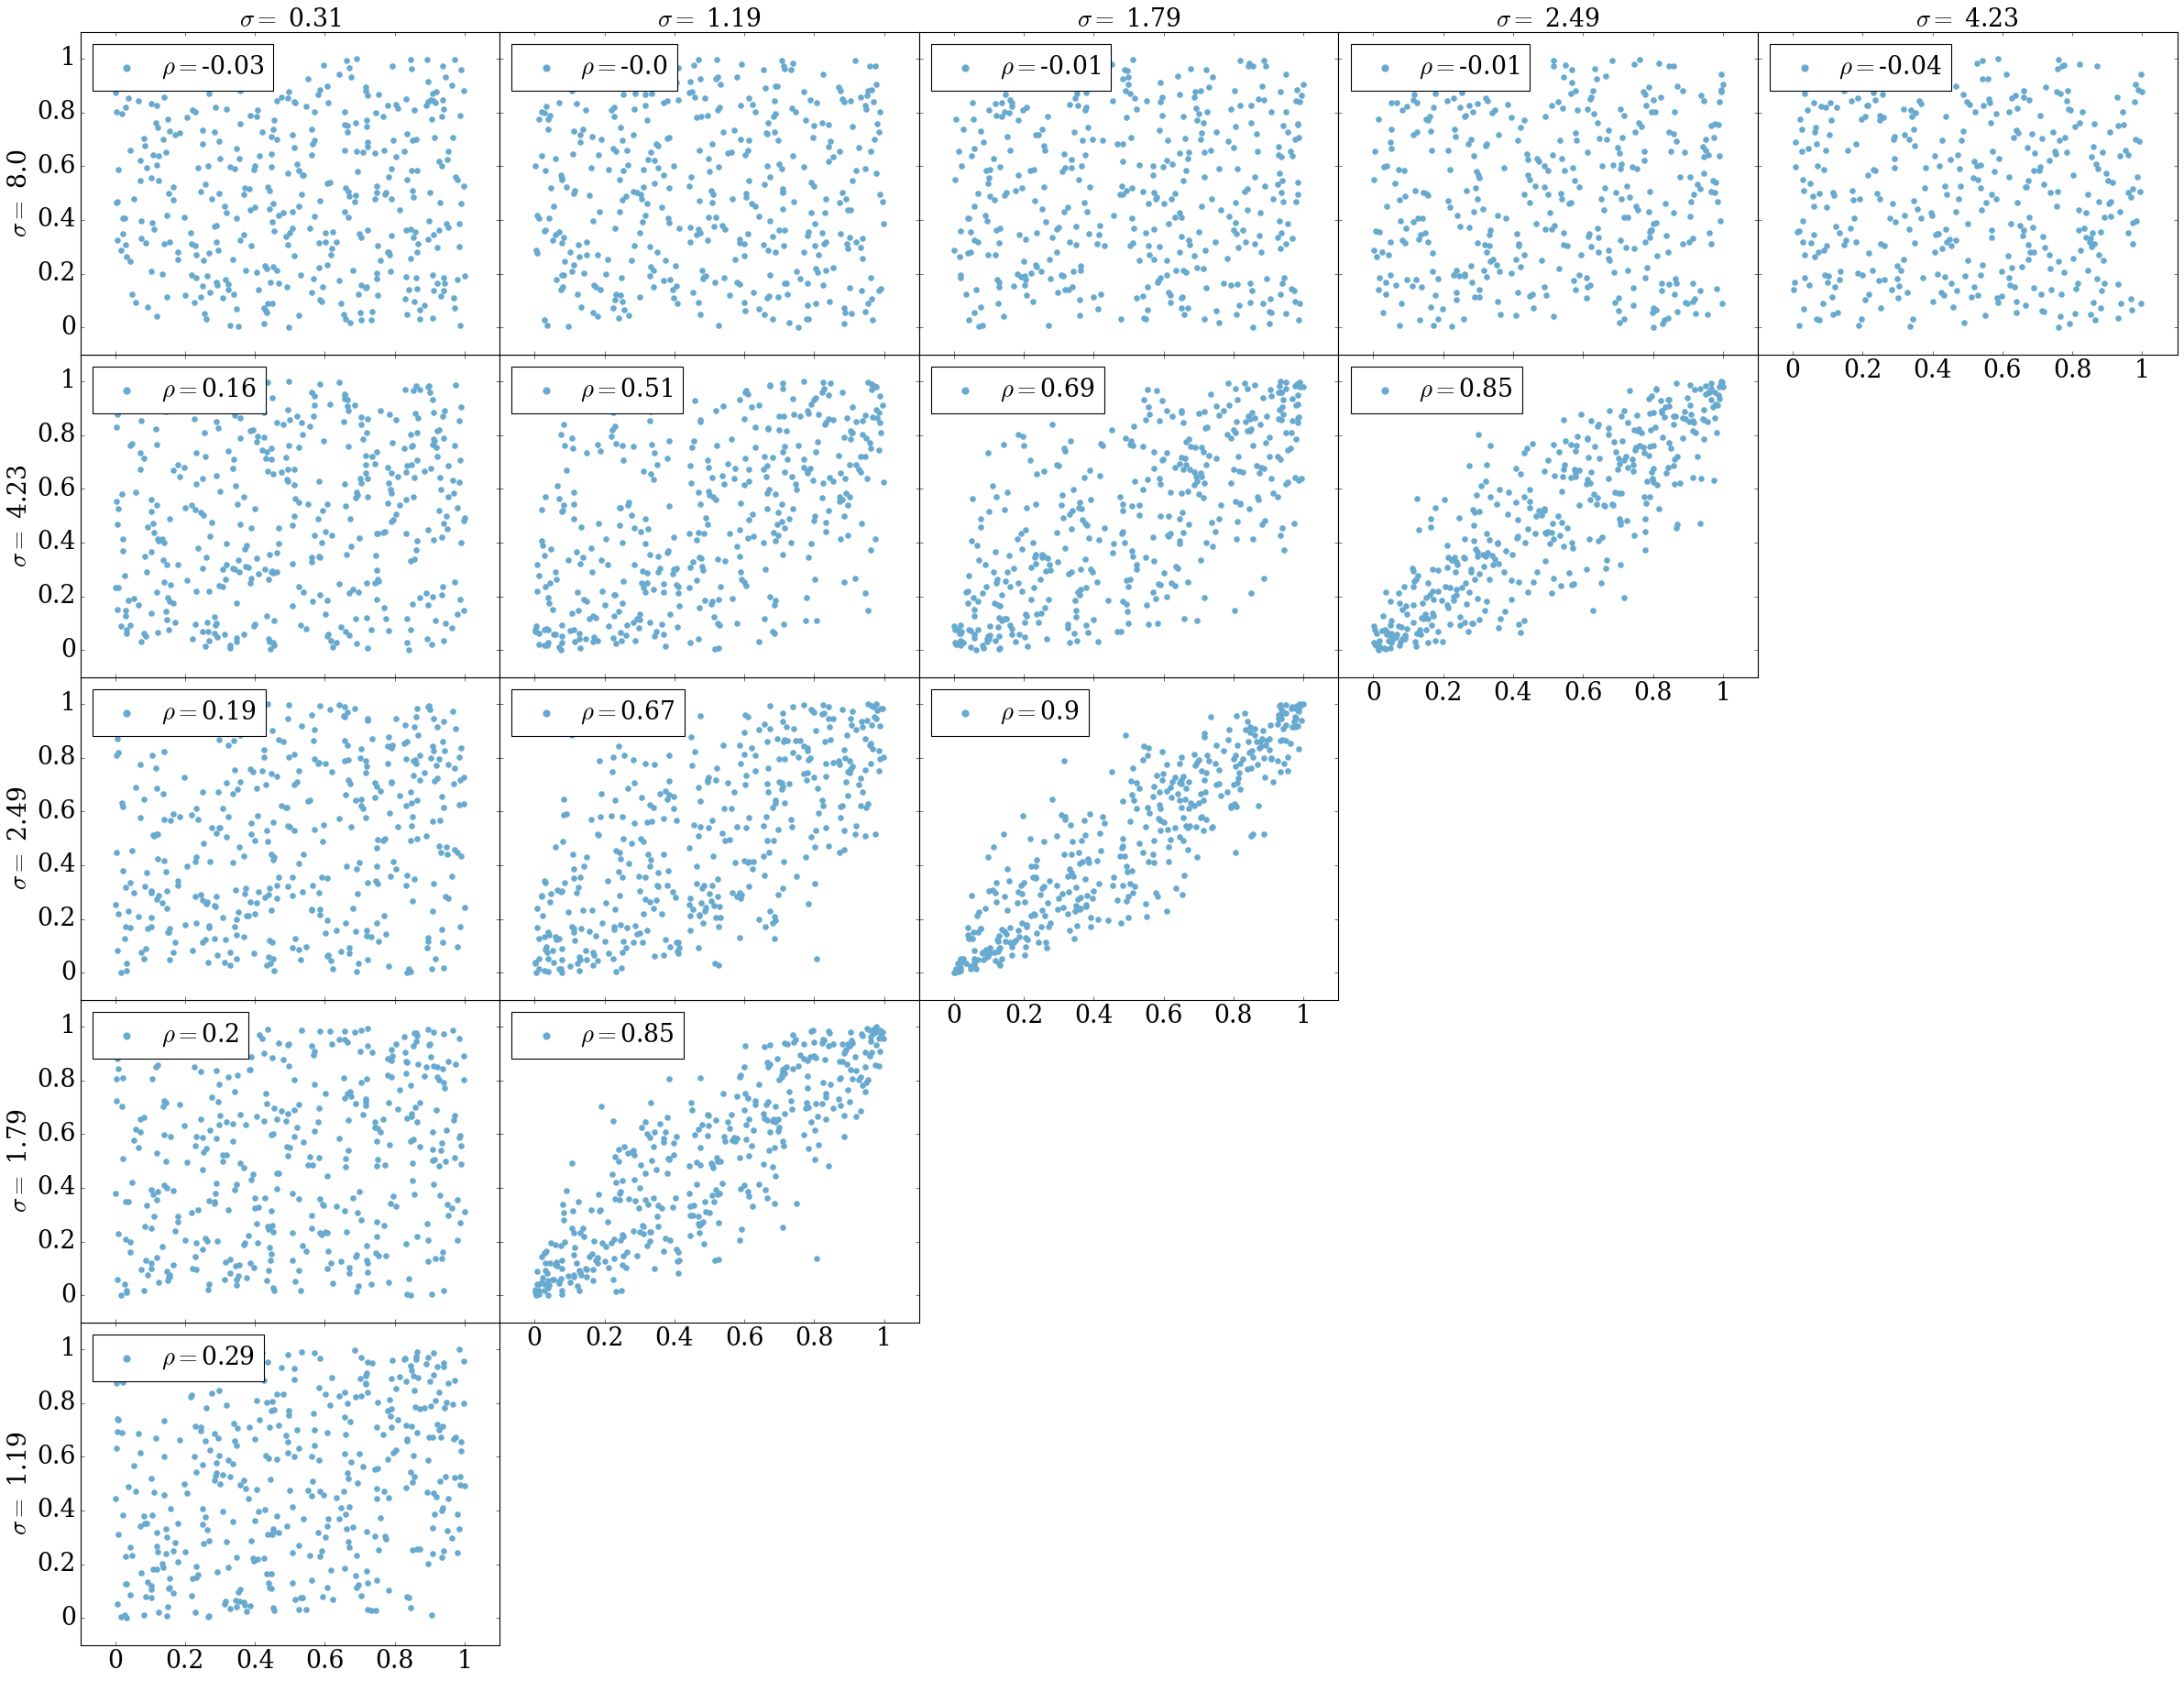

./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS60_Z180_cut60/


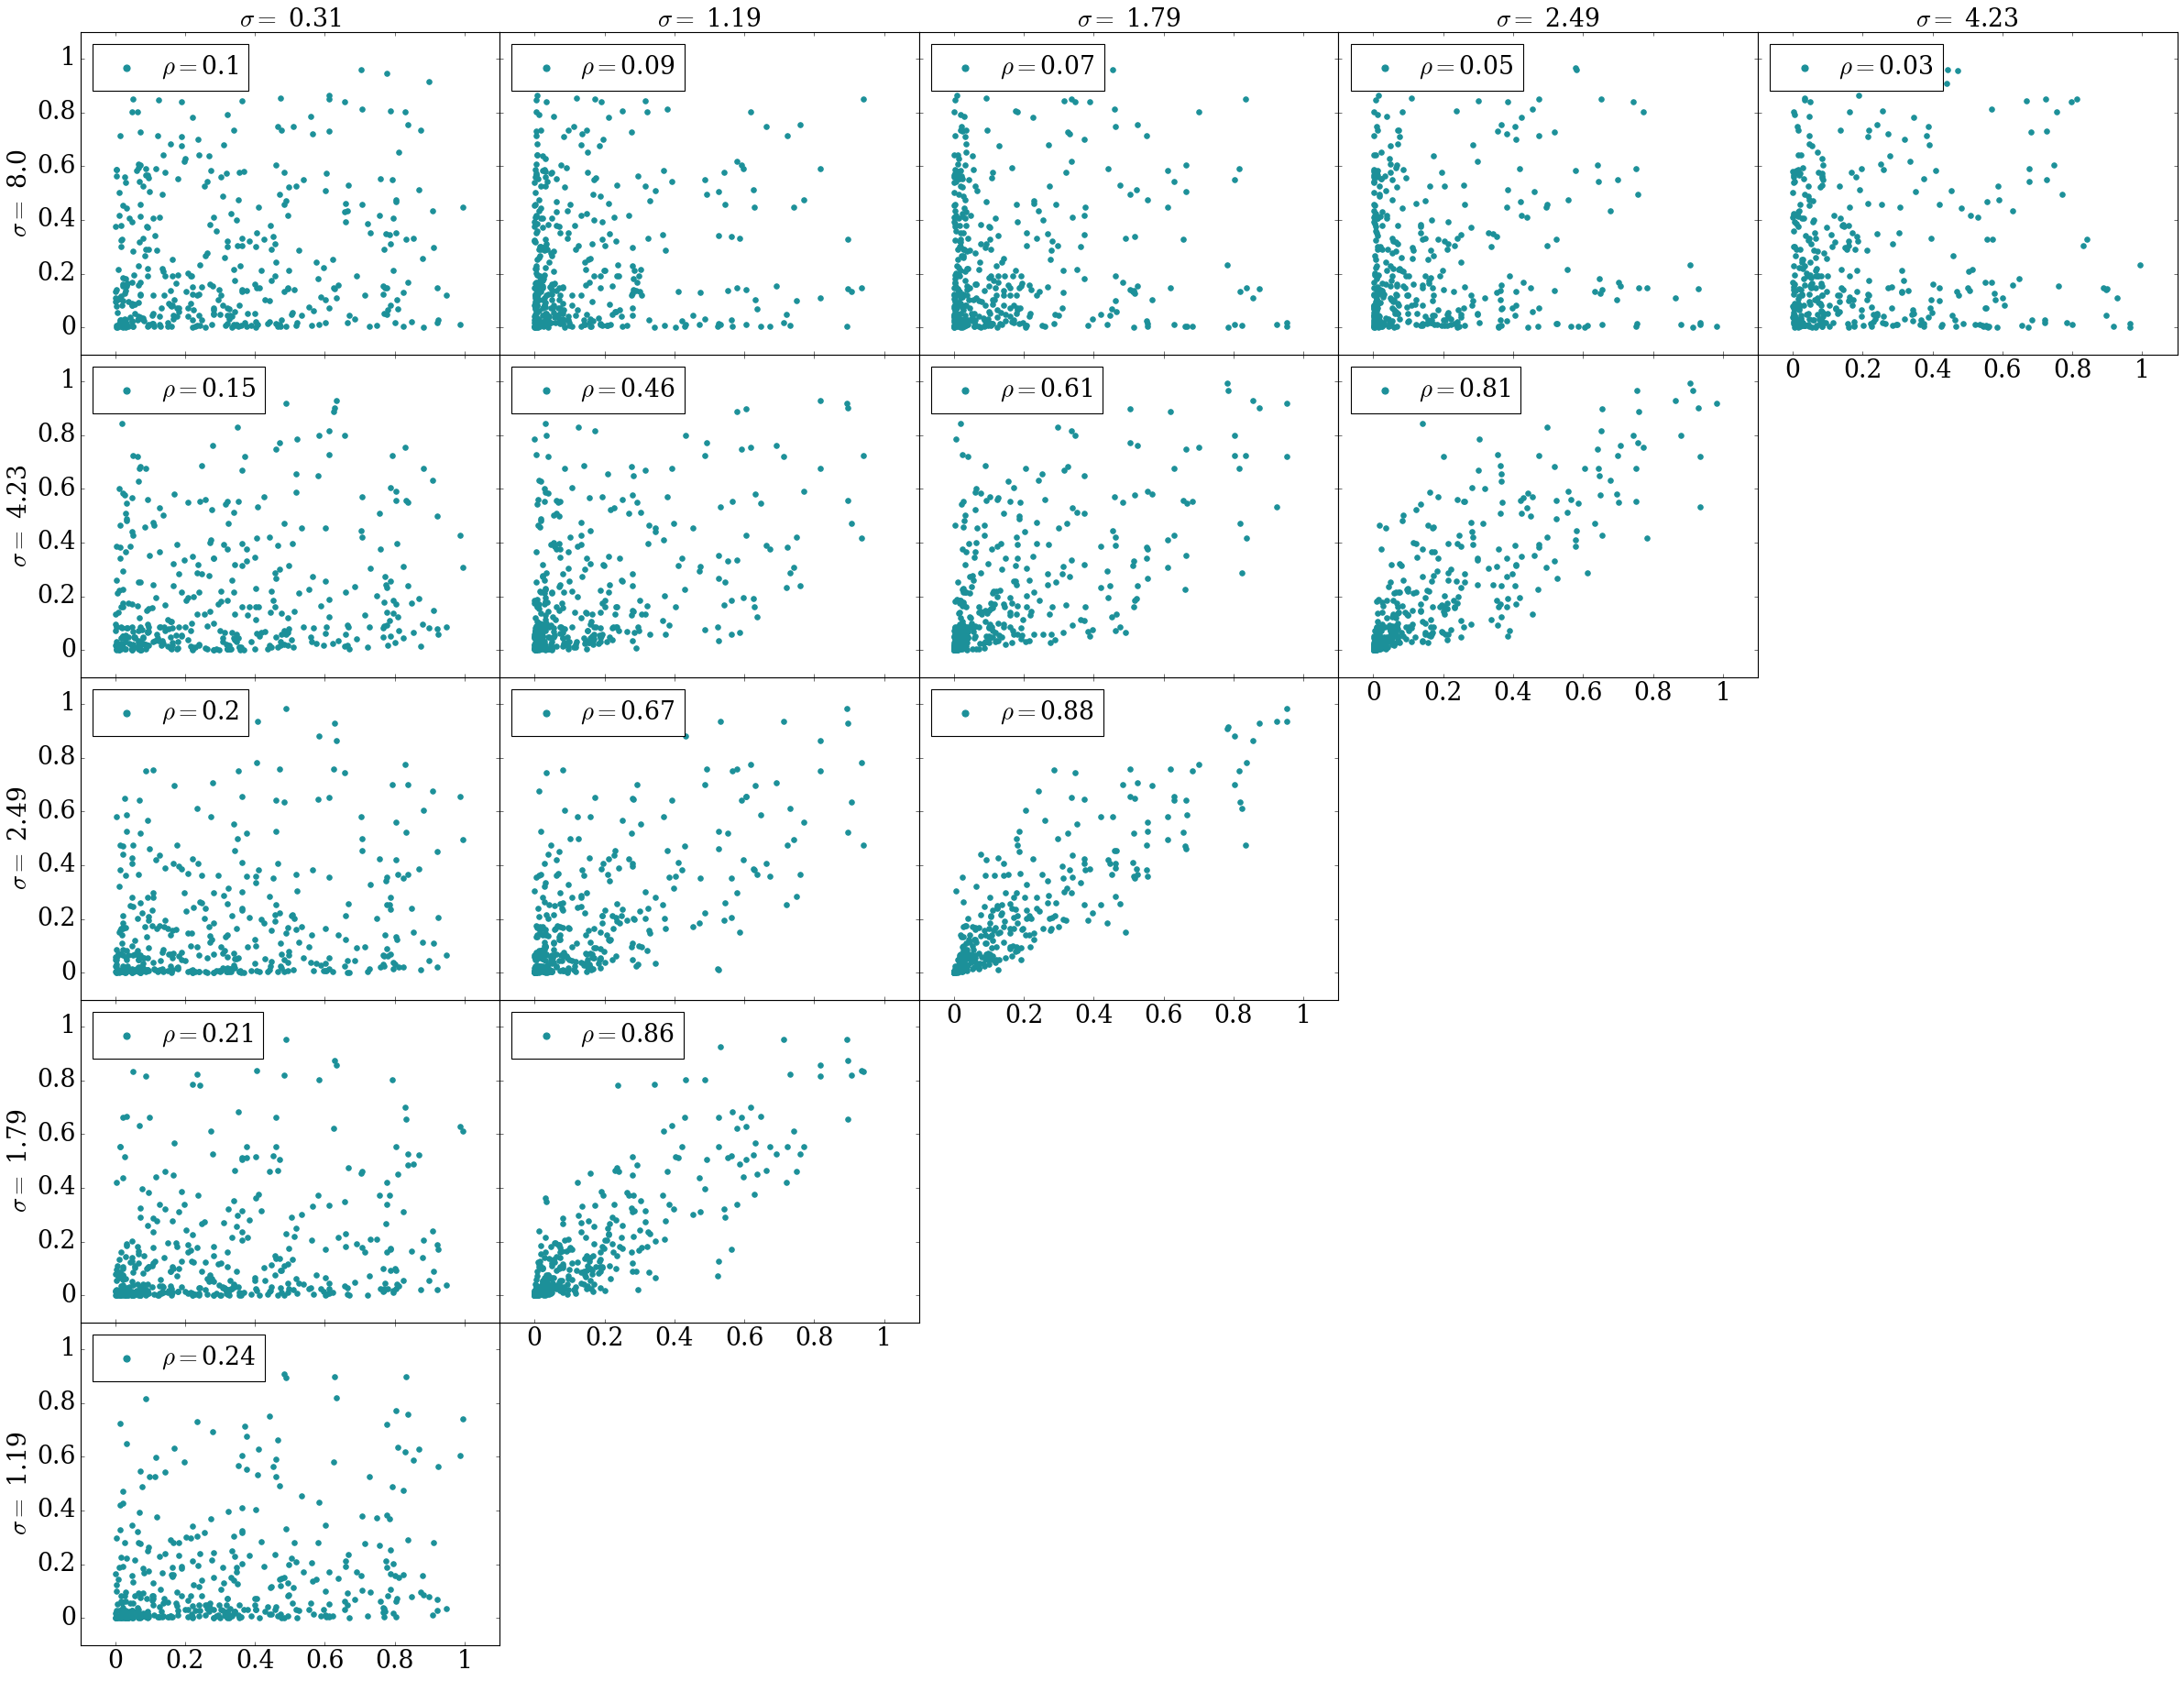

./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS30_Z300_cut60/


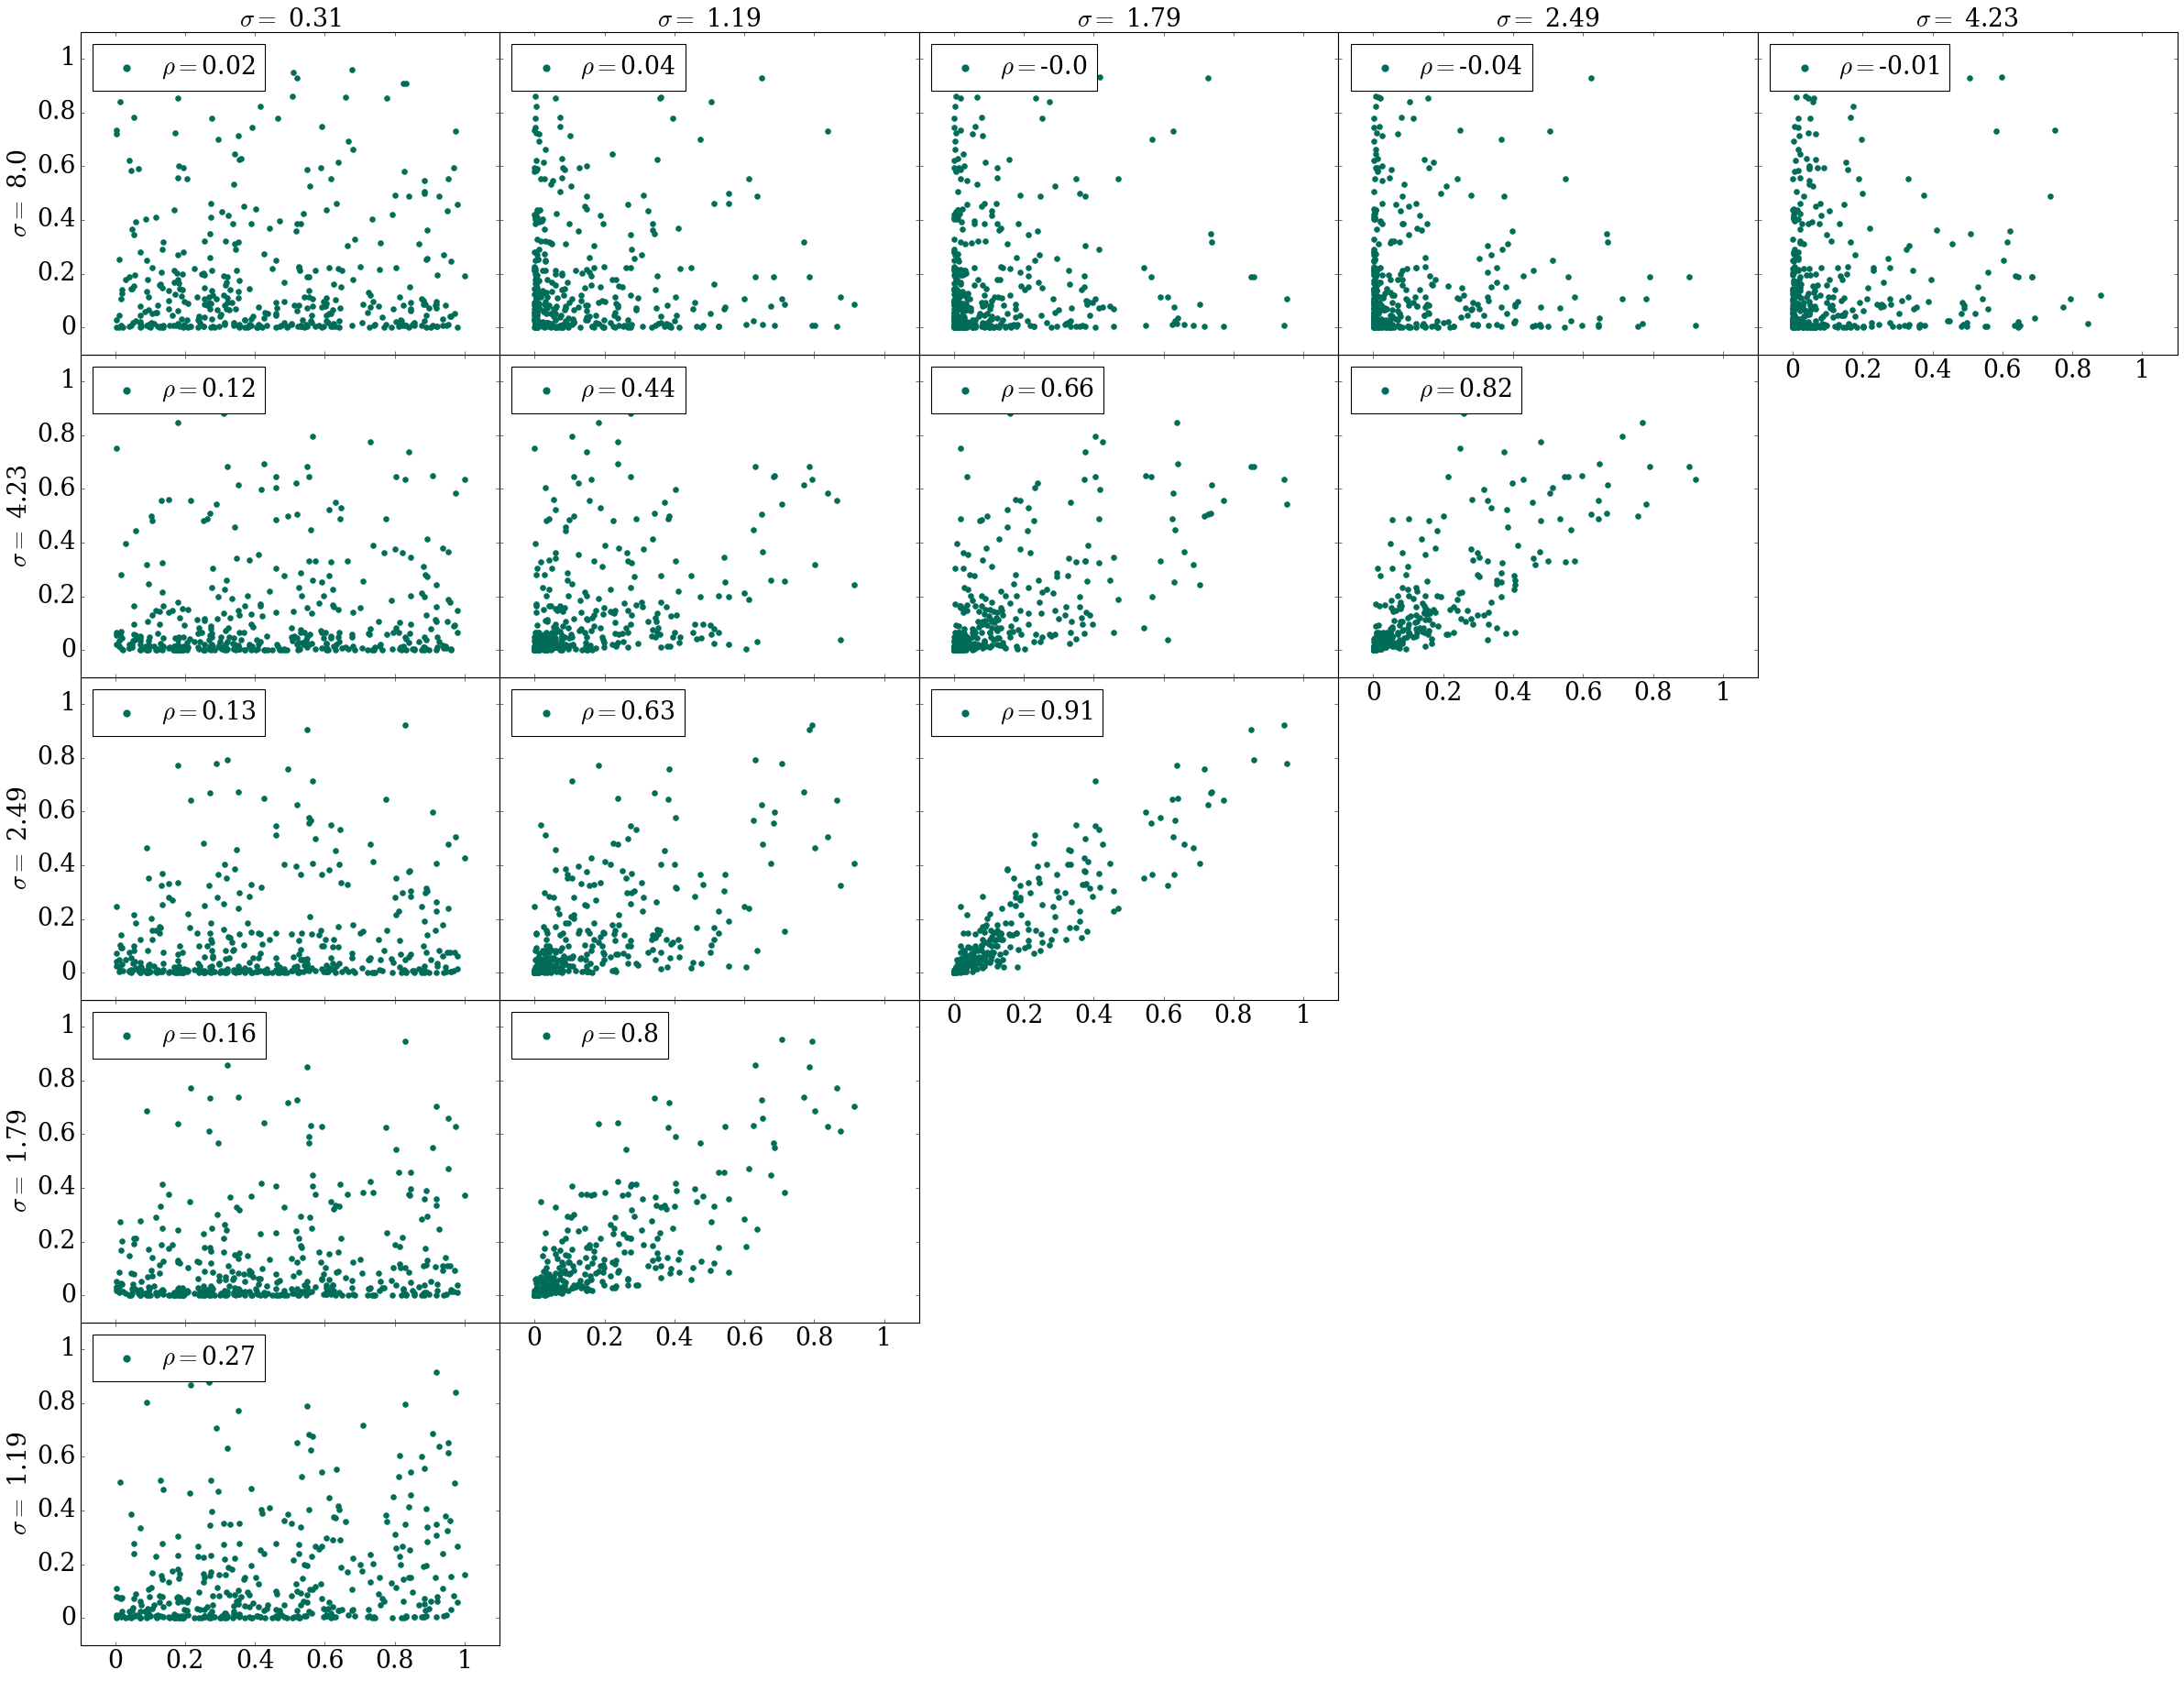

./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS8_Z600_cut60/


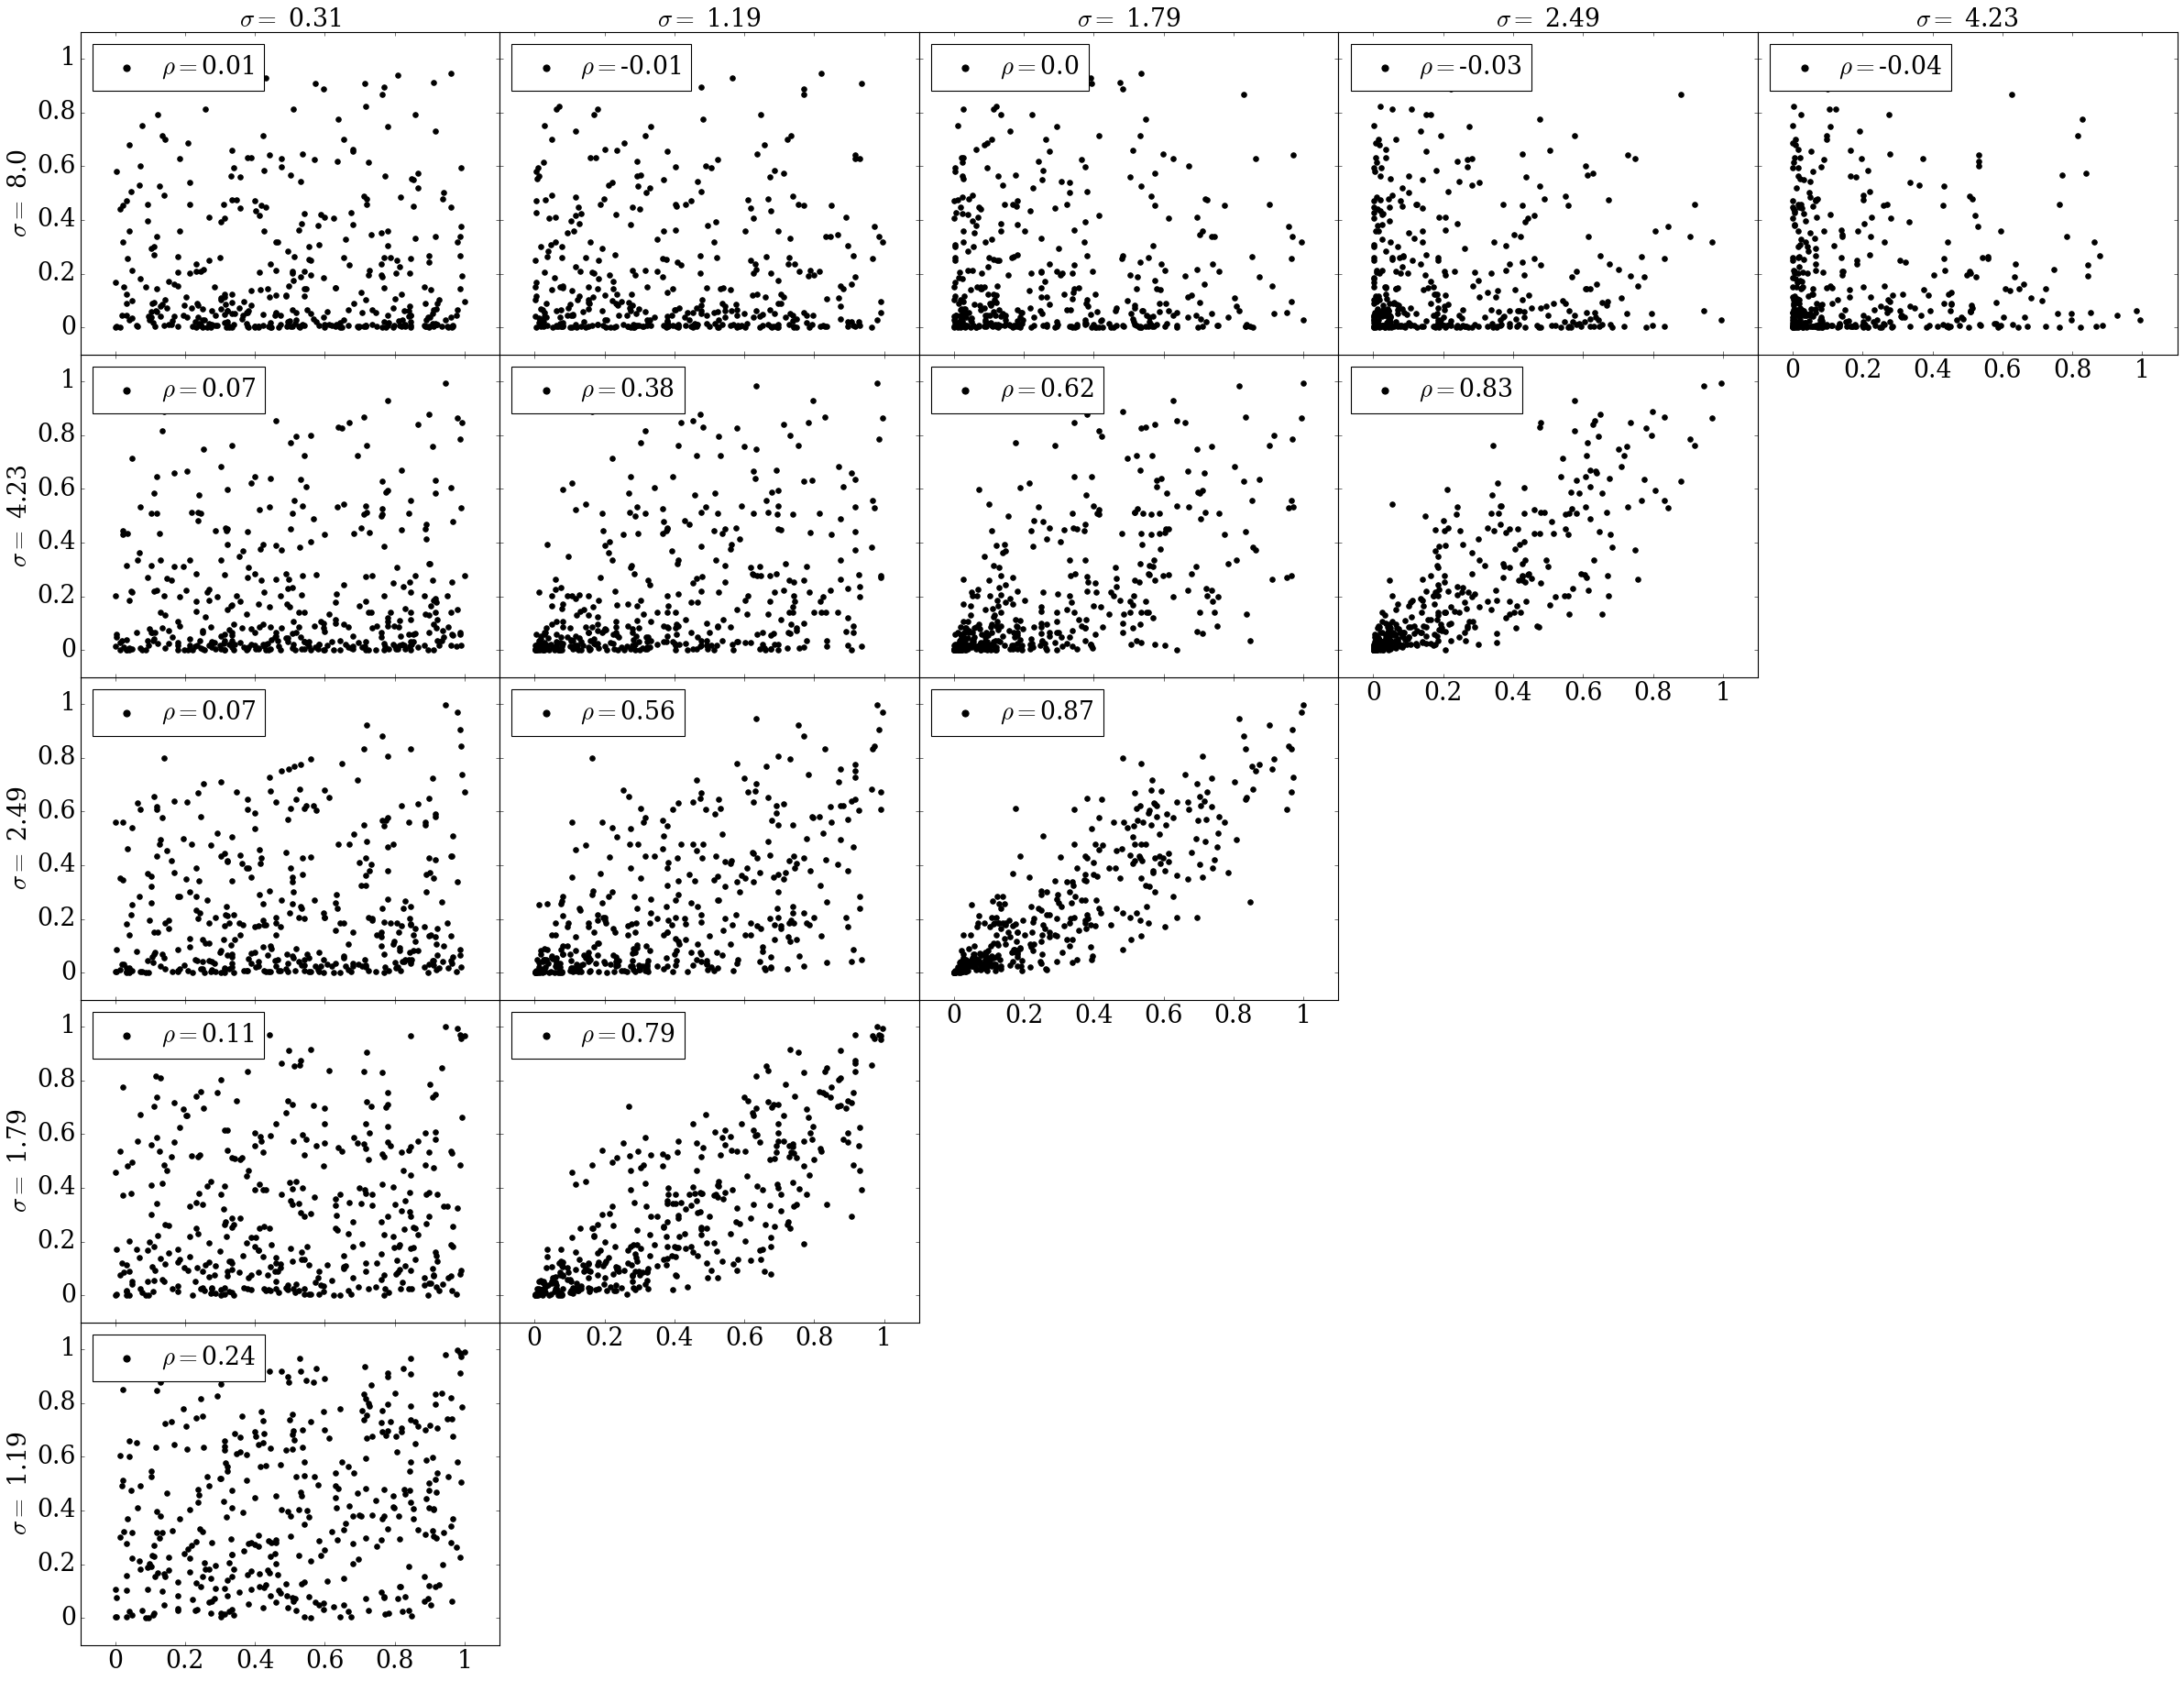

./exp_marco/output_5d/Ntoys1000_NR100000_NB20000_NS53_EFT5_cut60/


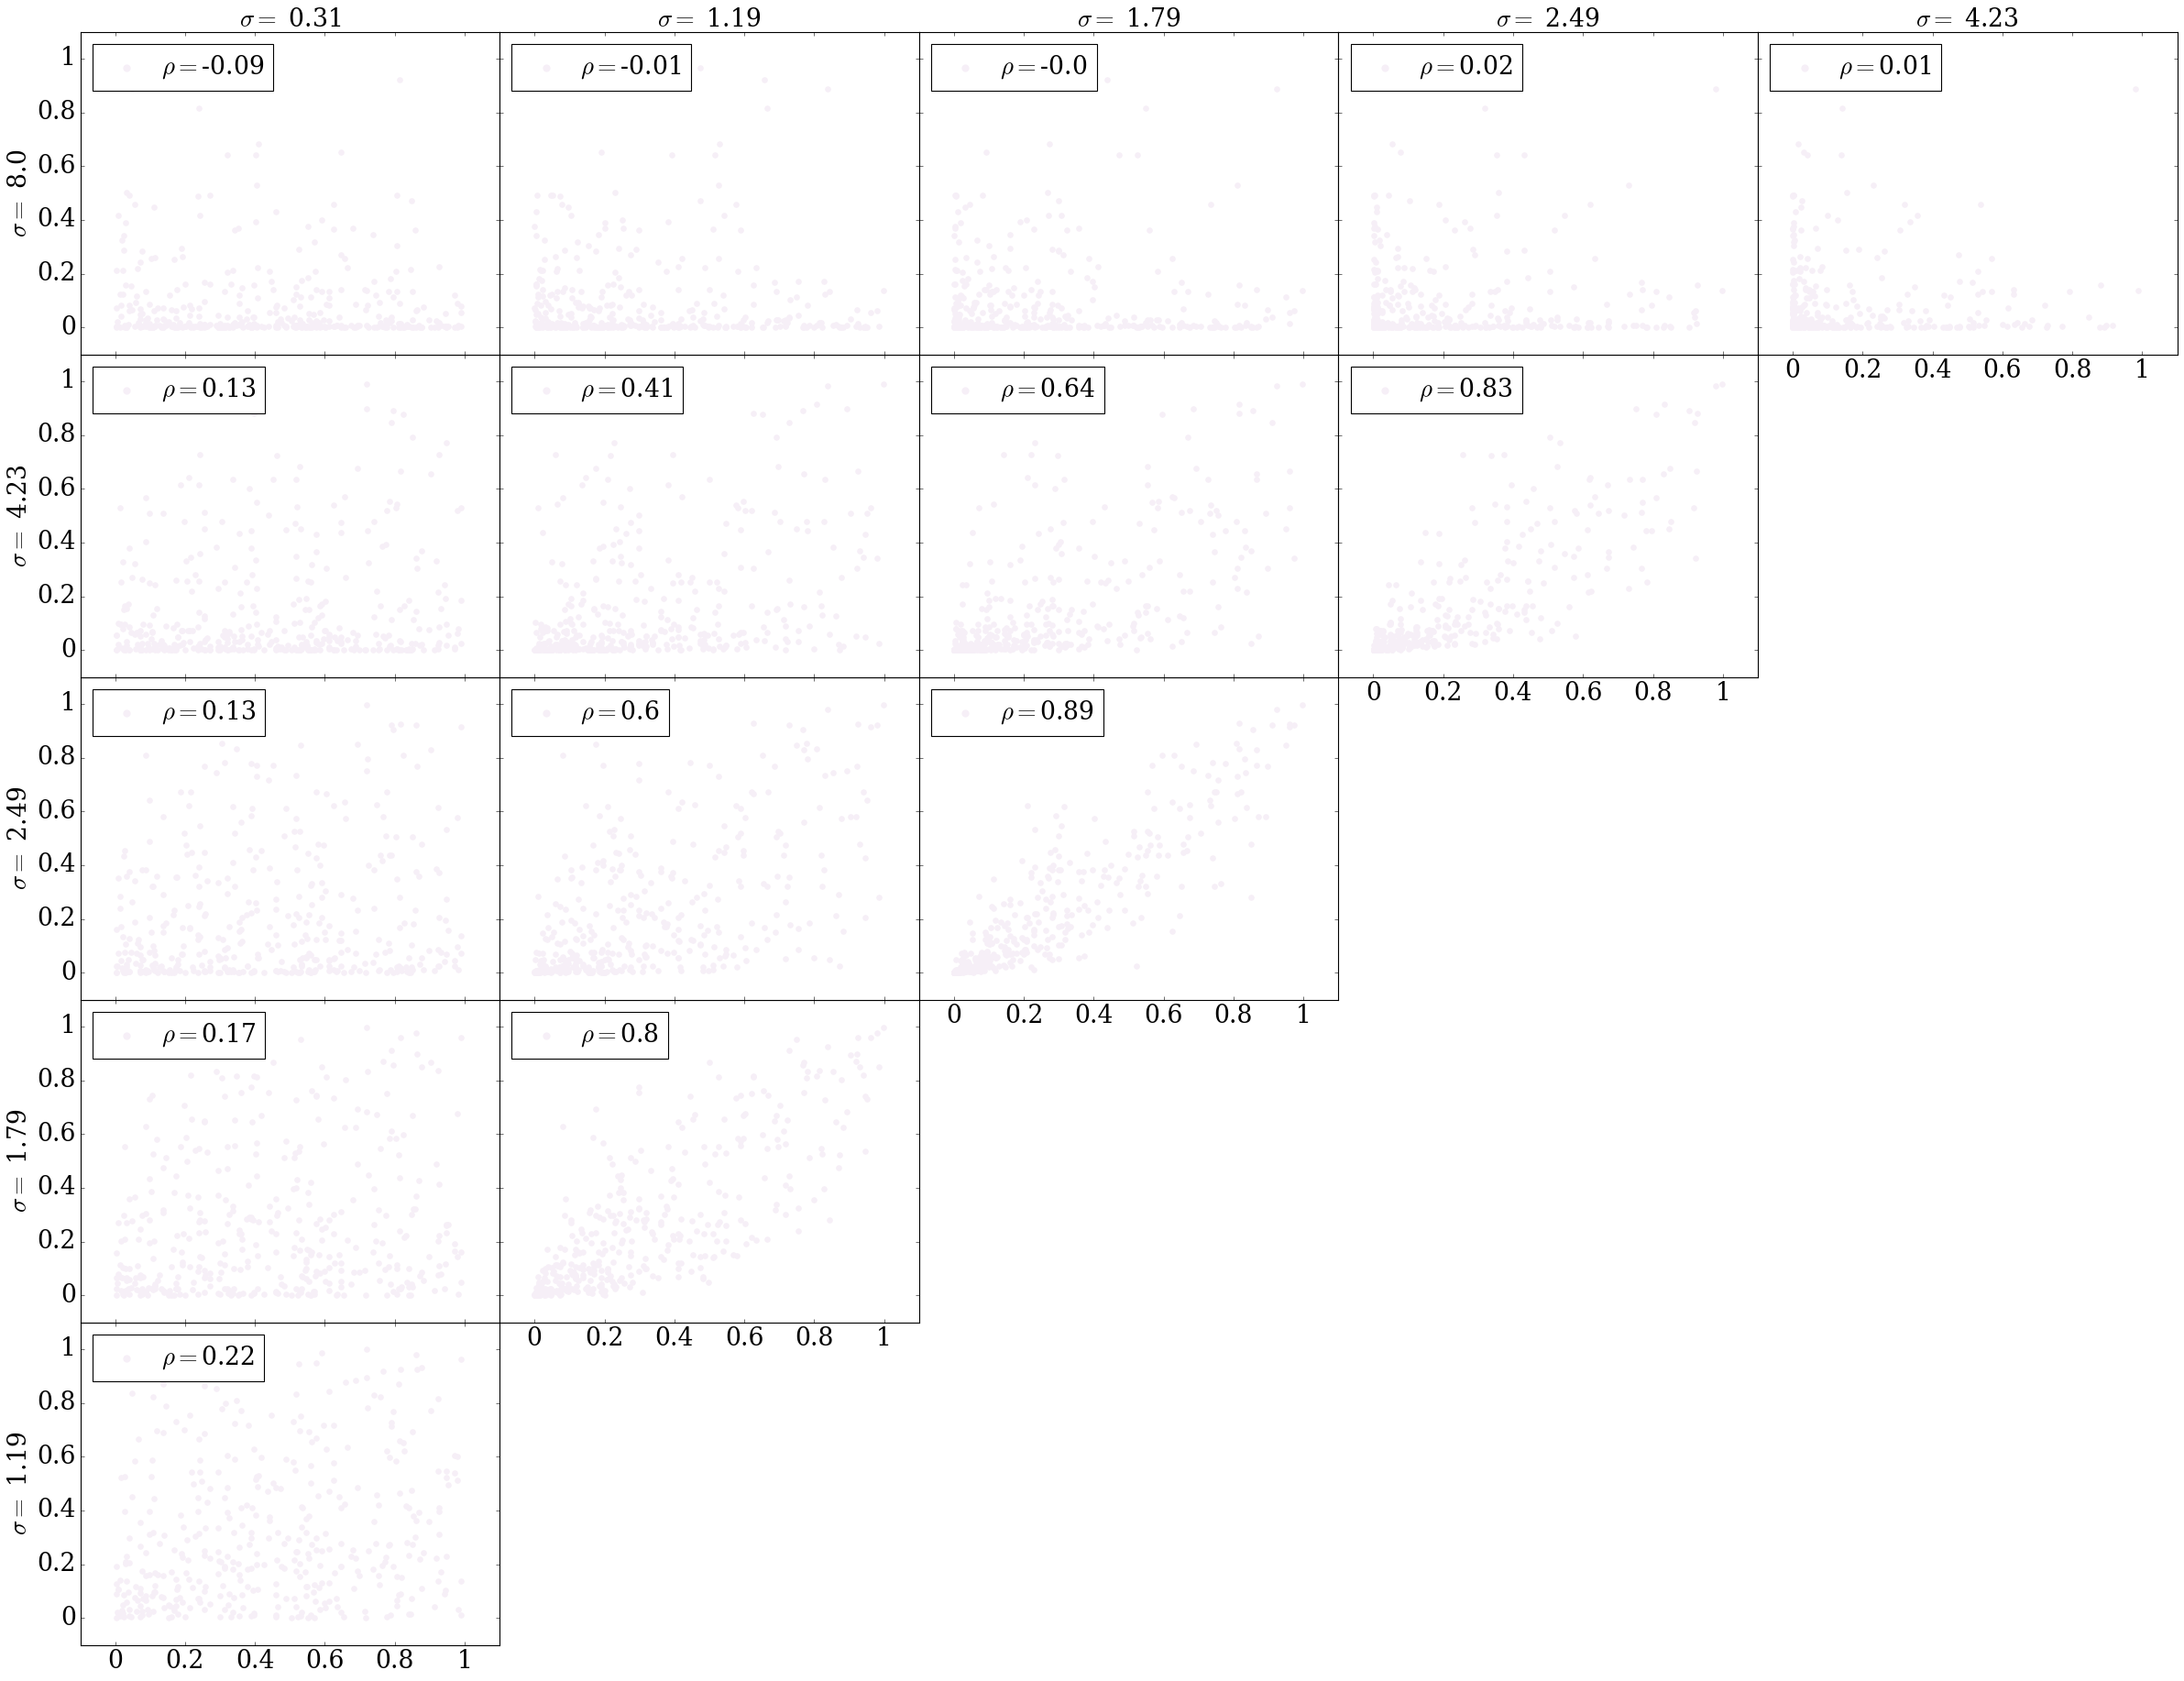

In [55]:
flk_sigmas = [0.31, 1.19, 1.79, 2.49, 4.23, 8.0 ]
labels_tests = [r'$\sigma=$ %s'%(str(flk_sigma)) for flk_sigma in flk_sigmas]
string_tests = ''

labels = [NP.replace('_', ' ').replace('NS', 'N(S)=').replace('std', r'$\sigma=$ ').replace('loc', r'$\bar x =$ ') for NP in np_list]
for s in labels_tests: string_tests+='_%s'%(s)

color = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2', 'darkblue', 'midnightblue']
color=['#67a9cf','#1c9099','#016c59', 'black', '#f6eff7','#bdc9e1',]
markers = ['o','o','o','o','o','o','o', 'o', 'o', 'o']
k=0
for data_folder in data_folders:
    print(data_folder)
    fig  = plt.figure(figsize=(26, 20))
    fig.patch.set_facecolor('white')
    ref = np.load(ref_folder+"/t_array.npy")[:,[0,3,4,5,8,9]]
    data = np.load(data_folder+"/t_array.npy")[:,[0,3,4,5,8,9]]
    for i in range(len(labels_tests)):
        for j in range(len(labels_tests)):
            if j<=i: continue
            ax= fig.add_axes([0.07+i*0.22, 0.07+(j-1)*0.22, 0.22, 0.22])
            if j>i:
                p_ref_i, p_data_i = return_pvalues(ref[:,i].reshape((-1,1)),data[:,i].reshape((-1,1)))
                p_ref_j, p_data_j = return_pvalues(ref[:,j].reshape((-1,1)),data[:,j].reshape((-1,1)))
                corr=np.corrcoef(p_data_i[:400,0], p_data_j[:400,0])[0][1]
                plt.scatter(p_data_i[:400,0], p_data_j[:400,0], color=color[k], s=24, marker=markers[k], 
                            label=r'$\rho=$%s'%(str(np.around(corr, 2)))#labels[k]
                           )
                font = font_manager.FontProperties(family='serif', size=24)
                plt.legend(prop=font, ncol=1, loc='upper left', scatterpoints=1, 
                           labelspacing=0.1, handletextpad=0.4, markerscale=1.3, frameon=True)        
            ax.set_xlim(-0.1, 1.1)
            ax.set_ylim(-0.1, 1.1)
            if not i:
                plt.ylabel(labels_tests[j],fontsize=24, fontname='serif')
                ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            else: 
                ax.tick_params(axis='y', which='both', labelleft=False)
            if i<=(j-2):
                ax.tick_params(axis='x', which='both', labelbottom=False)
            else:
                ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            if j==len(labels_tests)-1:
                plt.title(labels_tests[i],fontsize=24, fontname='serif')
    plt.savefig('./scatter_grid_5D_%i.pdf'%(k))
    k+=1
    plt.show()

# 6D

In [16]:
flk_sigmas = [1.2, 1.7, 2.5, 3.2, 3.9, 4.6, 5.1, 6.1, 12.2]
files = [
    './exp_gaia/6D/w1-5-25-50-75-90-95-99-out/t_6D-M853_lam1e-06_Niter100000000_NB121339_NS0.h5',
    './exp_gaia/6D/w1-5-25-50-75-90-95-99-out/t_6D-M853_lam1e-06_Niter100000000_NB121339_NS333.h5',
    ]

np_list = ['ref', 'S=333']

tstat_dict = {}
i=0
for f5 in files:
    #print(NP, np_list[i])
    tmp = []
    f = h5py.File(f5, 'r')
    if not len(flk_sigmas):
        flk_sigmas = list(f.keys())
        print(flk_sigmas)
    for flk_sigma in flk_sigmas:
        key = str(flk_sigma) 
        tmp.append(np.array(f[key]))#[:100,]
    f.close()
    tstat_dict[np_list[i]] = np.stack(tmp, axis=1)
    i+=1

In [17]:
for NP in np_list:
    print(NP)
    ref = tstat_dict['ref'][:,[0,2,3,4,7,8]]
    data = tstat_dict[NP][:,[0,2,3,4,7,8]]
    ref_90 = tstat_dict['ref'][:,[5]]
    data_90 = tstat_dict[NP][:,[5]]
    for i in range(ref.shape[1]):
        print(i, power(ref[:, [i]],data[:, [i]],zalpha=[2,3])[2])
    
    pmin_ref, pmin_data =  min_p(ref,data)
    prod_p_ref, prod_p_data = prod_p(ref,data)
    avg_p_ref, avg_p_data = avg_p(ref,data)
    print('p-min\t',  power(pmin_ref,pmin_data,zalpha=[2,3])[2])
    print('p-prod\t', power(prod_p_ref,prod_p_data,zalpha=[2,3])[2])
    print('p-avg\t',  power(avg_p_ref,avg_p_data,zalpha=[2,3])[2])
    print('t-smax\t', power(fusion(ref,1),fusion(data,1),zalpha=[2,3])[2])
    print('p-90\t', power(ref_90,data_90,zalpha=[2,3])[2])
    print('+++++++++++++++++++')

ref
0 [(0.023, 0.00470354456486783, 0.004651534381131306), (0.002, 0.0012878597196170913, 0.0012847633756582588)]
1 [(0.023, 0.00470354456486783, 0.004651534381131306), (0.002, 0.0012878597196170913, 0.0012847633756582588)]
2 [(0.023, 0.00470354456486783, 0.004651534381131306), (0.002, 0.0012878597196170913, 0.0012847633756582588)]
3 [(0.023, 0.00470354456486783, 0.004651534381131306), (0.002, 0.0012878597196170913, 0.0012847633756582588)]
4 [(0.023, 0.00470354456486783, 0.004651534381131306), (0.002, 0.0012878597196170913, 0.0012847633756582588)]
5 [(0.023, 0.00470354456486783, 0.004651534381131306), (0.002, 0.0012878597196170913, 0.0012847633756582588)]
p-min	 [(0.025, 0.004902553353690688, 0.004846521659633174), (0.005, 0.0021495725322381335, 0.0021357428055017707)]
p-prod	 [(0.023, 0.00470354456486783, 0.004651534381131306), (0.002, 0.0012878597196170913, 0.0012847633756582588)]
p-avg	 [(0.023, 0.00470354456486783, 0.004651534381131306), (0.002, 0.0012878597196170913, 0.00128476337

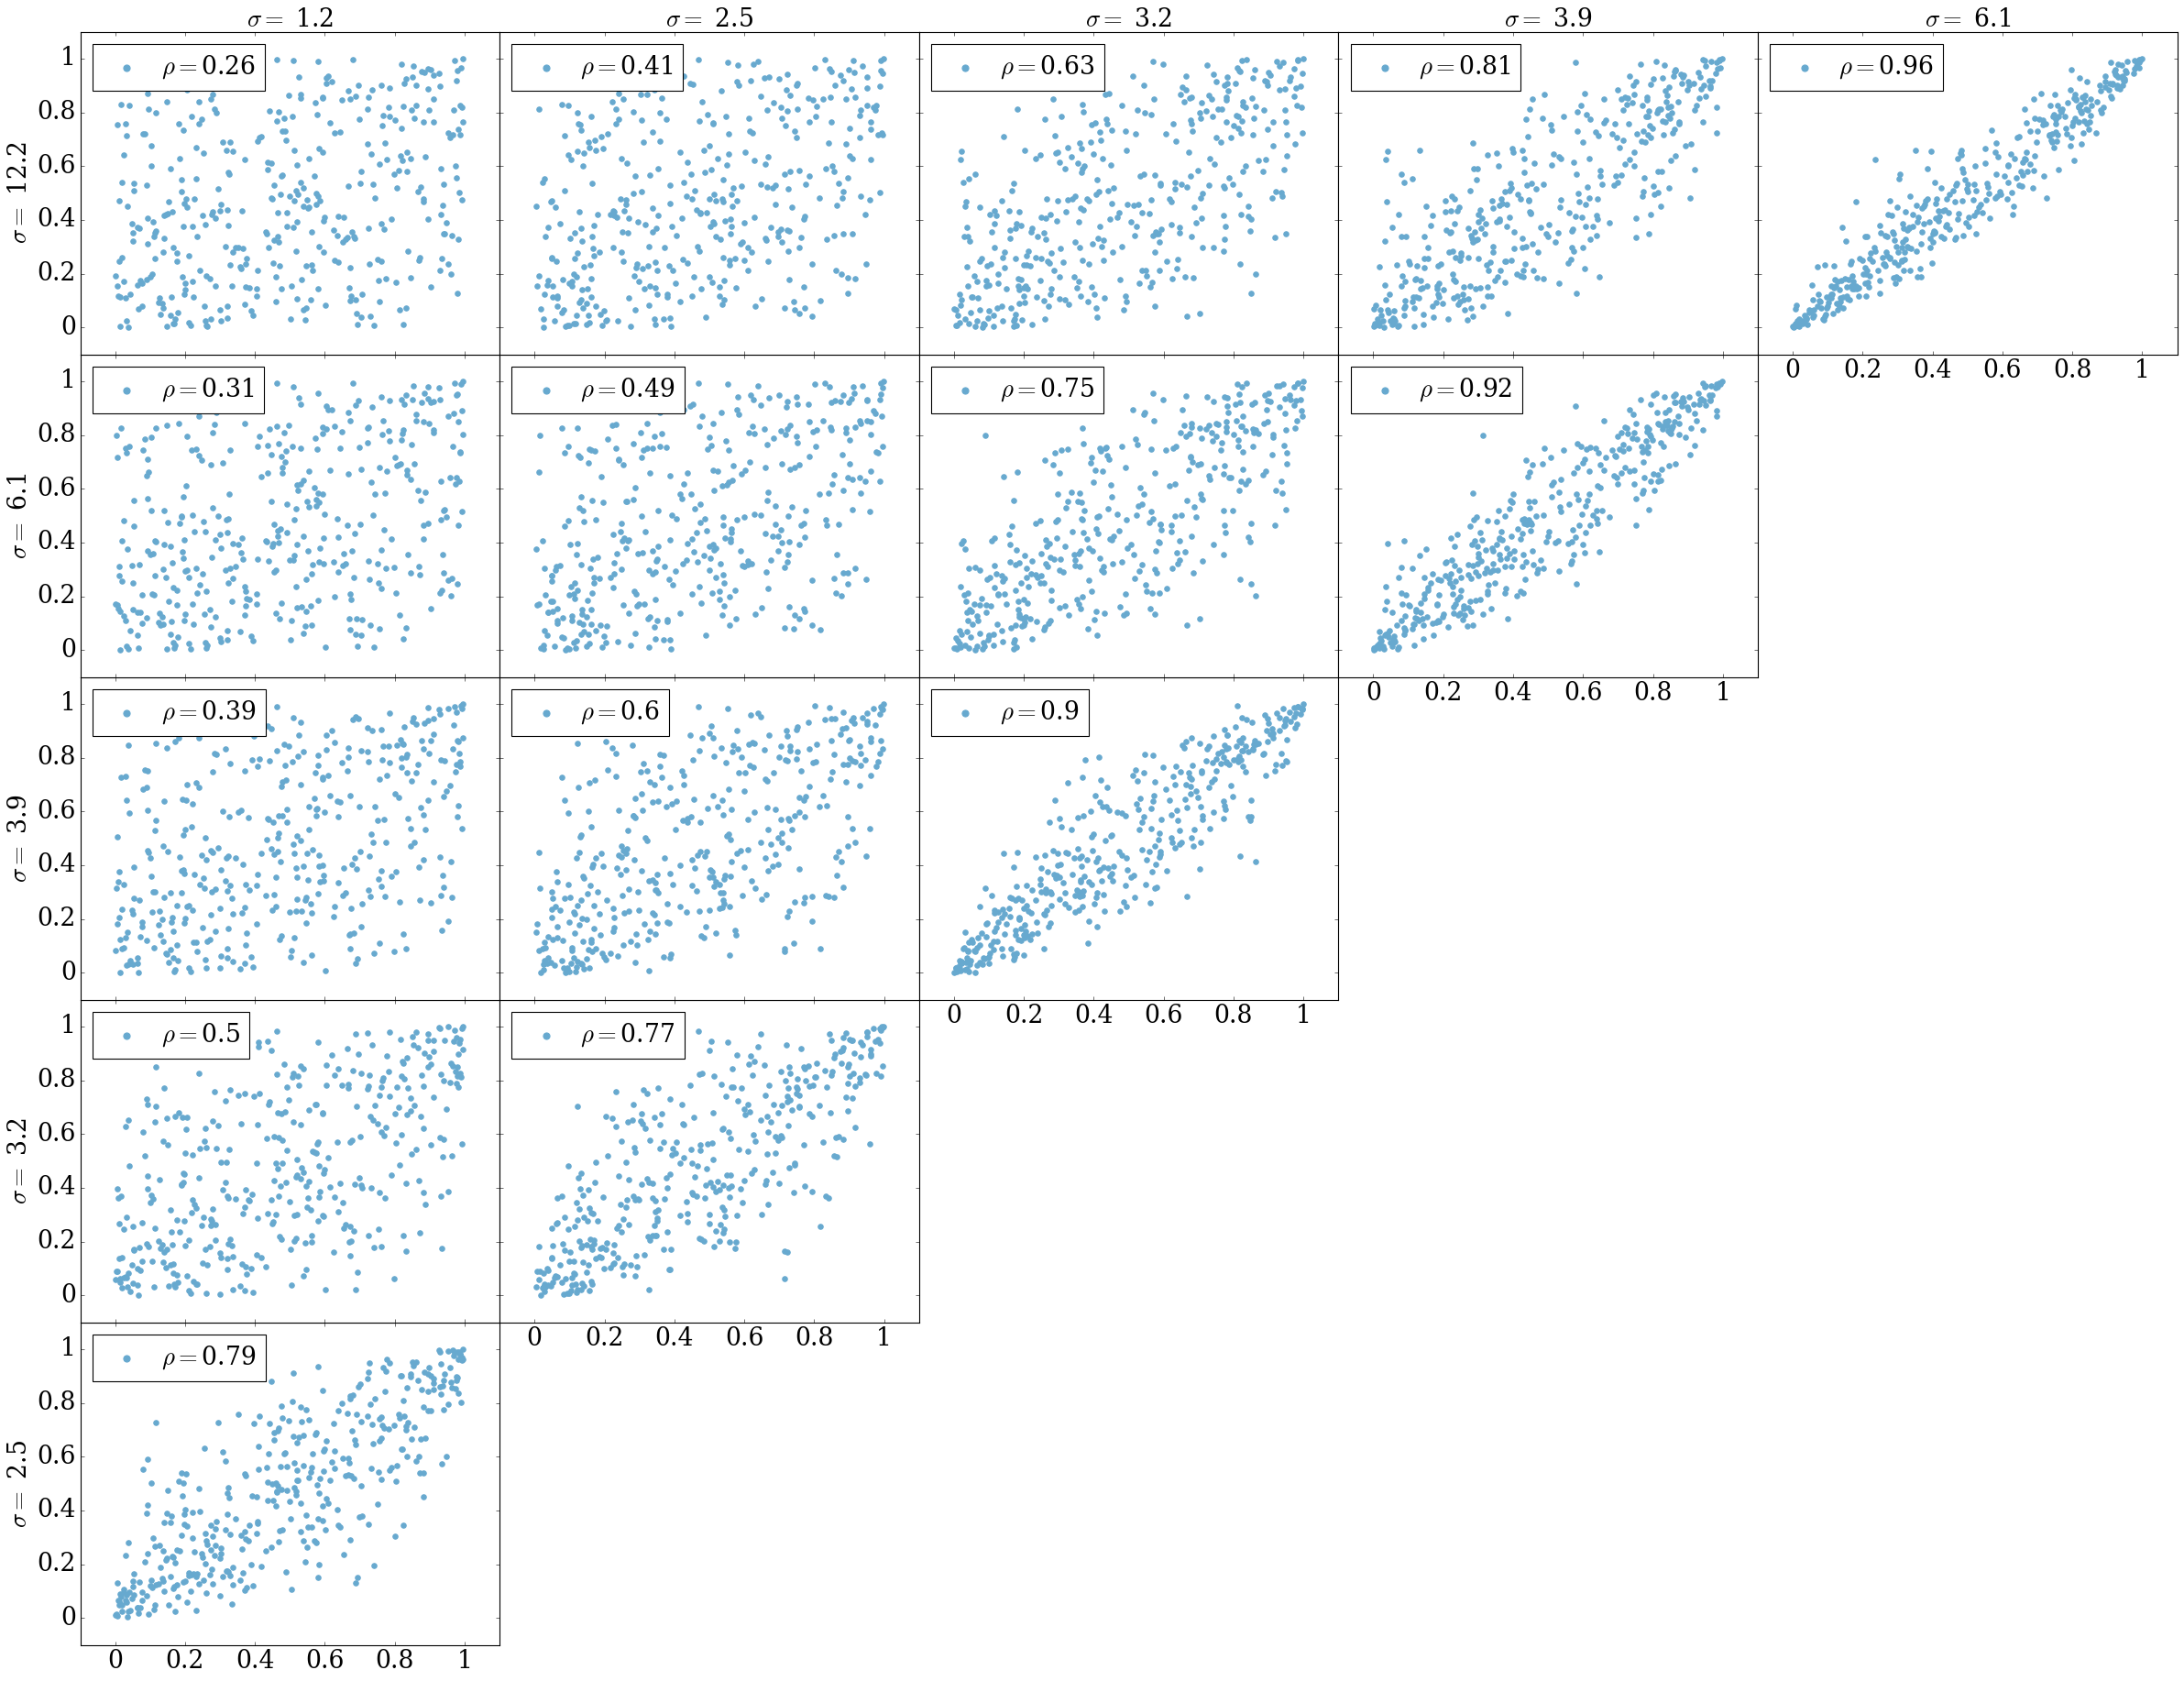

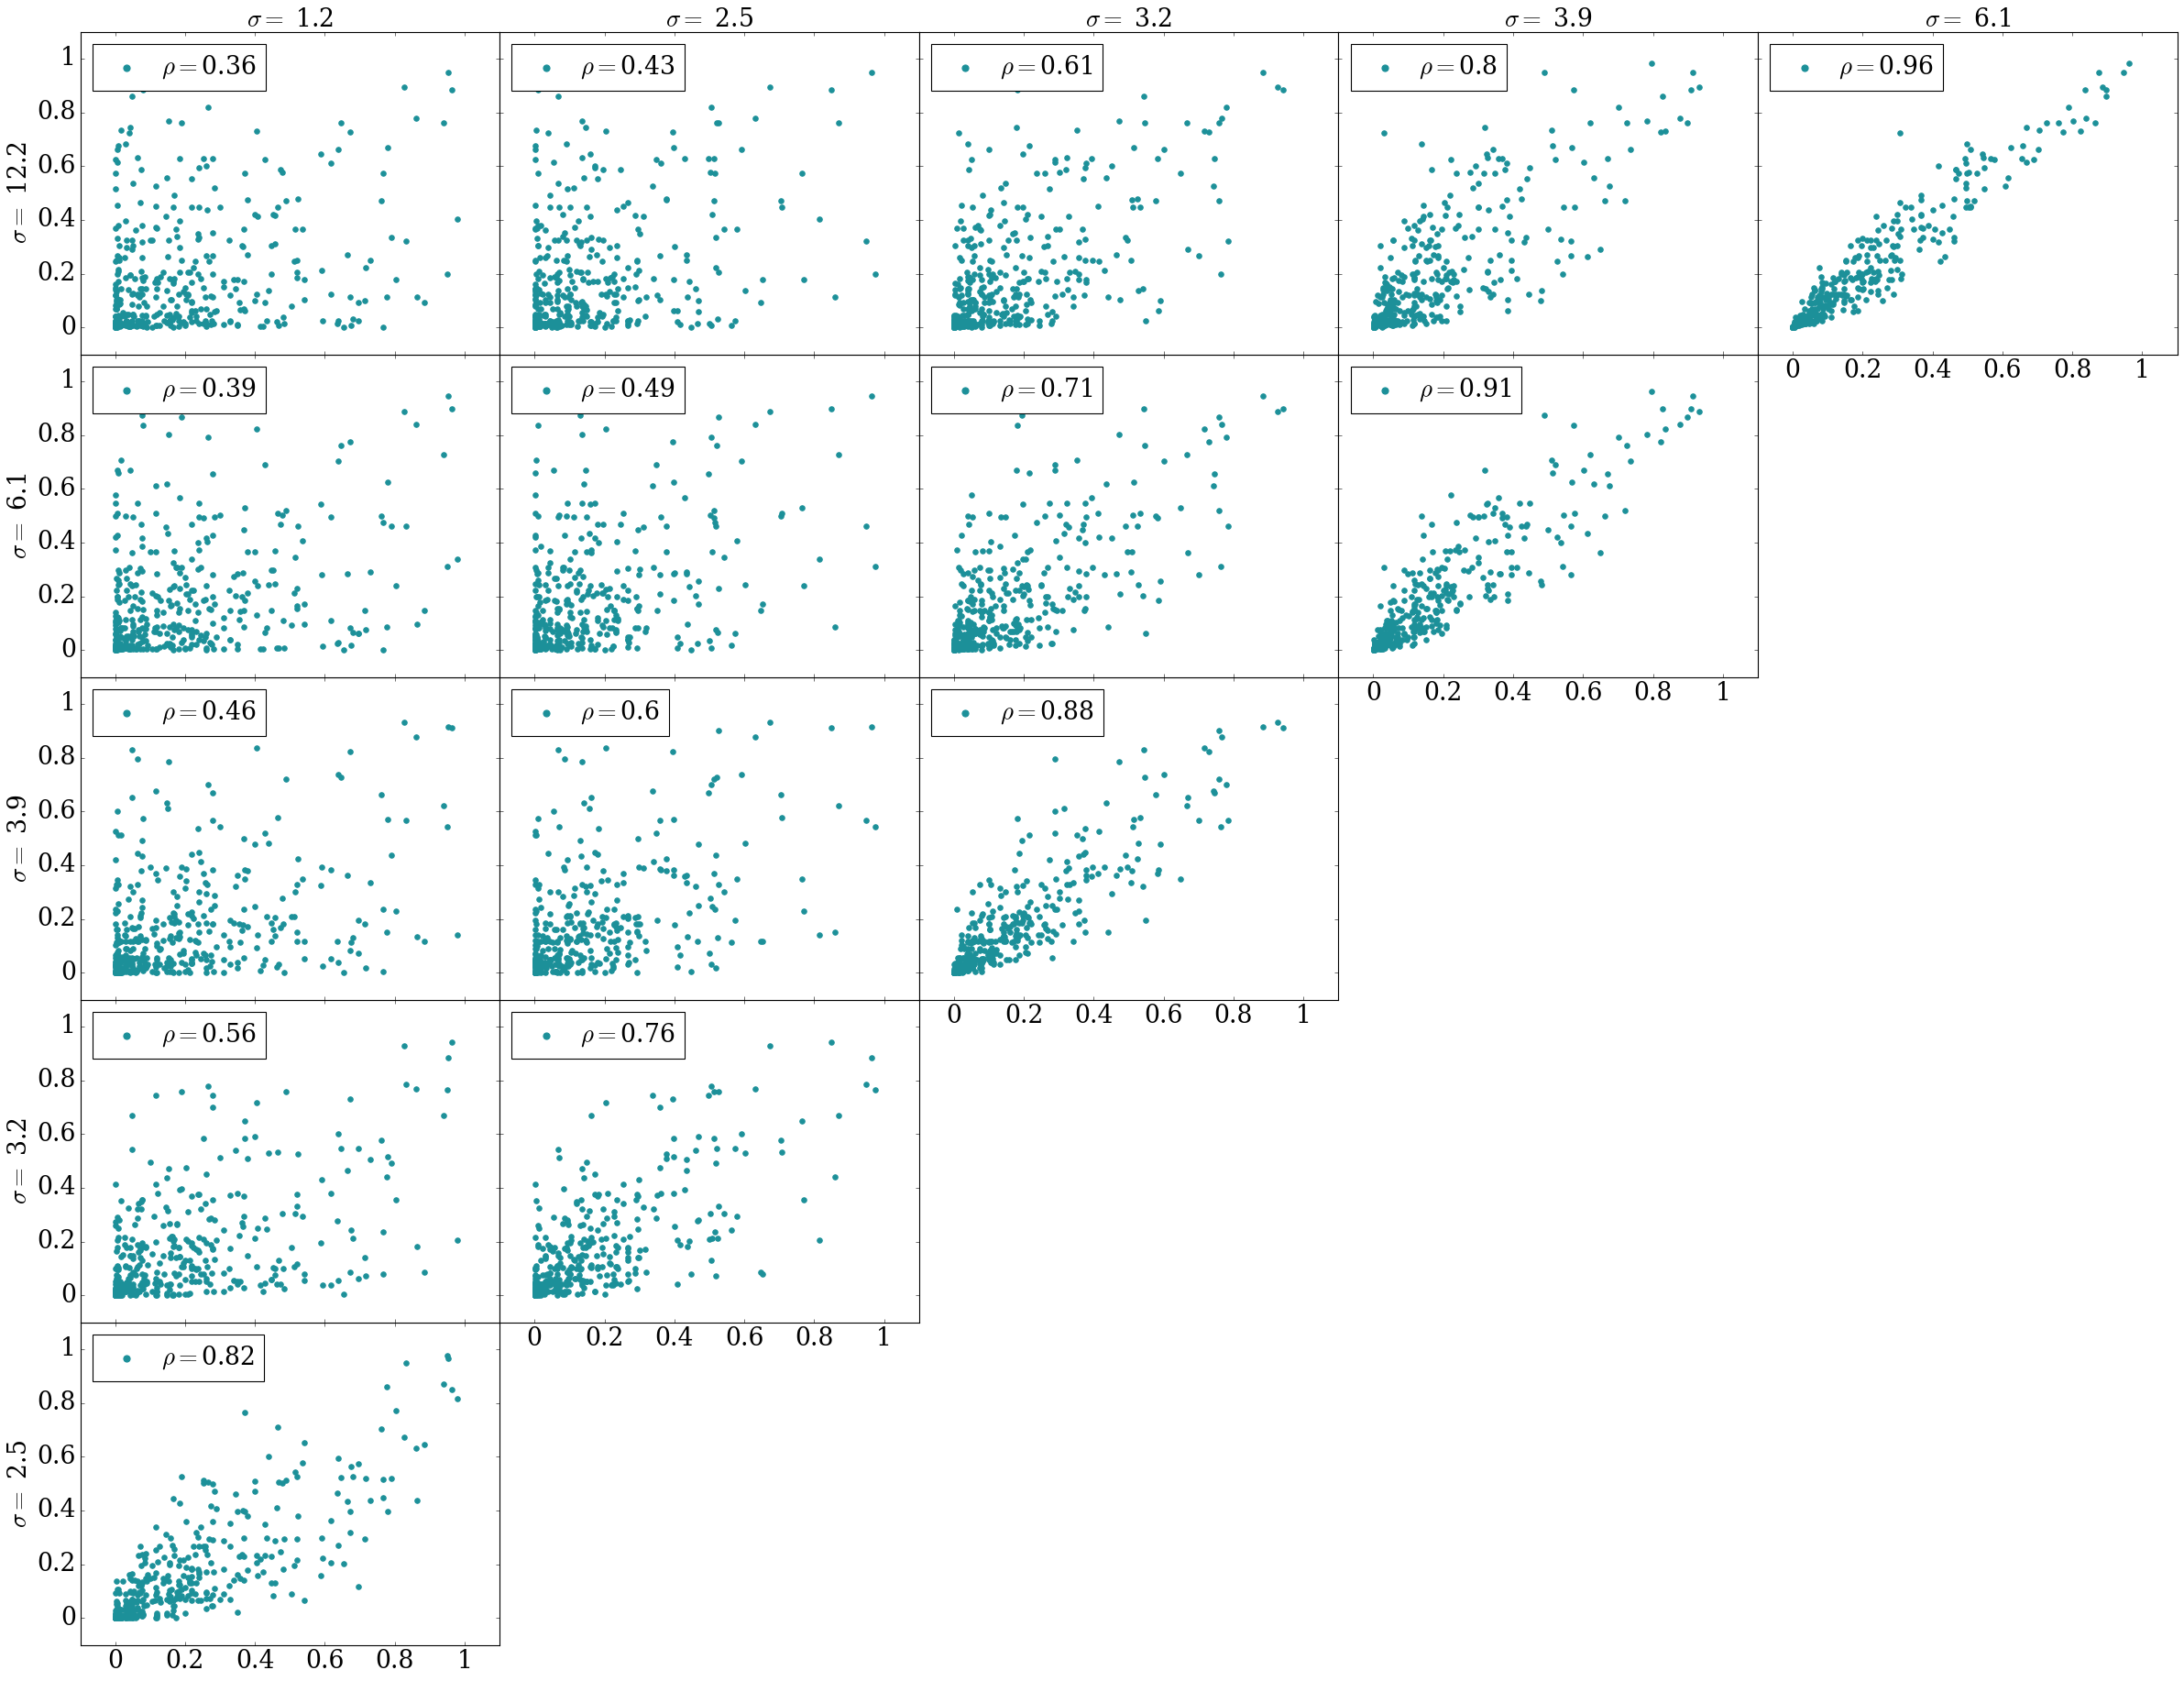

In [38]:
flk_sigmas = [1.2, #1.7, 
              2.5, 3.2, 3.9, 
              #4.6, 5.1, 
              6.1, 12.2]
labels_tests = [r'$\sigma=$ %s'%(str(flk_sigma)) for flk_sigma in flk_sigmas]
string_tests = ''

labels = [NP.replace('_', ' ').replace('NS', 'N(S)=').replace('std', r'$\sigma=$ ').replace('loc', r'$\bar x =$ ') for NP in np_list]
for s in labels_tests: string_tests+='_%s'%(s)

color = ['#9e0142','#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd','#5e4fa2', 'darkblue', 'midnightblue']
color=['#67a9cf','#1c9099','#016c59', 'black', '#f6eff7','#bdc9e1',]
markers = ['o','o','o','o','o','o','o', 'o', 'o', 'o']
for k in range(len(np_list)):
    fig  = plt.figure(figsize=(26, 20))
    fig.patch.set_facecolor('white')
    for i in range(len(labels_tests)):
        for j in range(len(labels_tests)):
            if j<=i: continue
            ax= fig.add_axes([0.07+i*0.22, 0.07+(j-1)*0.22, 0.22, 0.22])
            if j>i:
                p_ref_i, p_data_i = return_pvalues(tstat_dict['ref'][:,i].reshape((-1,1)),tstat_dict[np_list[k]][:,i].reshape((-1,1)))
                p_ref_j, p_data_j = return_pvalues(tstat_dict['ref'][:,j].reshape((-1,1)),tstat_dict[np_list[k]][:,j].reshape((-1,1)))
                corr=np.corrcoef(p_data_i[:, 0], p_data_j[:, 0])[0][1]
                plt.scatter(p_data_i[:400,0], p_data_j[:400,0], color=color[k], s=24, marker=markers[k], 
                            label=r'$\rho=$%s'%(str(np.around(corr, 2)))#labels[k]
                           )
                font = font_manager.FontProperties(family='serif', size=24)
                plt.legend(prop=font, ncol=1, loc='upper left', scatterpoints=1, 
                           labelspacing=0.1, handletextpad=0.4, markerscale=1.3, frameon=True)        
            ax.set_xlim(-0.1, 1.1)
            ax.set_ylim(-0.1, 1.1)
            if not i:
                plt.ylabel(labels_tests[j],fontsize=24, fontname='serif')
                ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            else: 
                ax.tick_params(axis='y', which='both', labelleft=False)
            if i<=(j-2):
                ax.tick_params(axis='x', which='both', labelbottom=False)
            else:
                ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1],[0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=24, fontname='serif')
            if j==len(labels_tests)-1:
                plt.title(labels_tests[i],fontsize=24, fontname='serif')
    plt.savefig('./scatter_grid_6D_%i.pdf'%(k))
    plt.show()

In [36]:
np.corrcoef(p_data_i[:, 0], p_data_j[:, 0])

array([[1.        , 0.79038263],
       [0.79038263, 1.        ]])

In [35]:
p_data_i.shape

(1000, 1)